In [17]:
!pip install  -r requirements.txt
#!pip install git+https://github.com/pcko1/etherscan-python.git


You should consider upgrading via the '/Users/rafael/PycharmProjects/etherscan/venv/bin/python3 -m pip install --upgrade pip' command.


In [13]:
#pip install progressbar2
!pip uninstall --y  progressbar
!pip uninstall --y  progressbar2
!pip install progressbar

Found existing installation: progressbar2 4.2.0
Uninstalling progressbar2-4.2.0:
  Successfully uninstalled progressbar2-4.2.0
  Using cached progressbar-2.5-py3-none-any.whl
You should consider upgrading via the '/Users/rafael/PycharmProjects/etherscan/venv/bin/python3 -m pip install --upgrade pip' command.


In [29]:
!pip list | grep progressbar


progressbar                  2.5
You should consider upgrading via the '/Users/rafael/PycharmProjects/etherscan/venv/bin/python3 -m pip install --upgrade pip' command.


In [14]:
import sys
print(sys.executable)


/Users/rafael/PycharmProjects/etherscan/venv/bin/python3


In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
import json, requests
import argparse
import sys
import csv
import datetime, dateutil.parser

# lienar algebra library

import pandas as pd
import time
import re
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
%matplotlib inline



In [18]:
data = pd.read_excel('data_ethereum_ponzi_2018.xlsx', index_col=0)

In [19]:
data.head()

,Name,Address,In Tx,Out Tx,In ETH,Out ETH,In USD,Out USD,Paying,Paid,Date 1st Tx,Date last Tx,Lifetime,Sources,Type
Id,,,,,,,,,,,,,,,
1,Government,0xf45717552f12ef7cb65e95476f217ea008167ae3,723.0,846.0,2.938886e+07,2.938886e+07,35.738,"$40,066.24",40.0,27.0,2016-03-08,2017-03-20,377.0,NaN,Ponzi
2,EthereumPyramid,0x7011f3edc7fa43c81440f9f43a6458174113b162,978.0,339.0,9.860812e+09,9.167812e+09,5.044,"$5,290.46",327.0,125.0,2015-09-07,2018-04-11,947.0,NaN,Ponzi
3,ProtectTheCastle2,0x7d56485e026d5d3881f778e99969d2b1f90c50af,890.0,1257.0,1.332225e+08,1.332225e+08,186.04,"$190,802.38",101.0,68.0,2016-03-20,2018-02-22,704.0,NaN,Ponzi
4,TreasureChest,0x4865e85c72a27ca6c362da75ba6707c07464b953,73.0,1197.0,8.755649e+09,8.738955e+09,946,$940.82,16.0,10.0,2016-03-26,2016-04-07,12.0,NaN,Ponzi
5,ZeroPonzi,0x43bbc7fafb860d974037b8f7dd06b6f6fe799b3e,627.0,499.0,4.489784e+09,4.489177e+09,49.816,"$49,770.97",47.0,28.0,2016-04-04,2017-10-27,571.0,NaN,Ponzi


In [20]:
data.shape

(1819, 15)

In [21]:
import requests
import re
from io import StringIO
import pandas as pd
import time

BASE_URL = "https://etherscan.io/api?module=opcode&action=getopcode&address="
headers = {
    "User-Agent": "my-app/0.0.1",
    "Accept": "/",
    "Accept-Encoding": "gzip, deflate",
    "Cookie": "__cflb=02DiuFnsSsHWYH8WqVXaqGvd6BSBaXQLURYZCq6LPndsS",
    "Connection": "keep-alive",
    "cache-control": "no-cache"
    } 

def get_opcodes(address, headers=headers):
    #address = str(input("Please input an address: ").strip())
    url = BASE_URL + address 
    response = requests.get(url,headers=headers )
    time.sleep(1)
    json_data = json.loads(response.text)
    asis_opcode = json_data['result']
    opcodes = clean_opcode(asis_opcode)
    return opcodes


def clean_opcode(asis_opcode):
    opcode = re.sub(r'<br>', ',', asis_opcode , flags=re.IGNORECASE) 
    opcode = re.sub(r',', '\n', opcode , flags=re.IGNORECASE) 
    opcode= opcode.splitlines()
    opcode = [line.partition(' ')[0]  for line in opcode ]
    opcode = ' '.join(map(str, opcode))
    return opcode
    
#vals =get_opcodes('0x6492904953ed9015d6b37f8063b65c8de105d837')
#len(vals)
#vals

In [22]:
#data_copy=data.copy()

In [23]:
data["opcodes"] = np.nan

In [24]:
#Deprecated uses progressbar2
def retrieve_opcodes_to_df(data):
    with progressbar.ProgressBar(max_value=len(data.index)) as bar:
        for index, row in data.iterrows():
            opcode = get_opcodes(row['Address'])
            data.loc[index,'opcodes'] = opcode
            print(index,  row['Address'], row['Name'] )
            bar.update(index)
        return data

In [27]:
import progressbar
def retrieve_opcodes_to_df(data):
    bar = progressbar.ProgressBar(maxval=len(data.index)).start()
    
    for index, row in enumerate(data.iterrows()):
        opcode = get_opcodes(row[1]['Address'])
        data.loc[index, 'opcodes'] = opcode
        print(index, row[1]['Address'], row[1]['Name'])
        bar.update(index + 1)
    
    bar.finish()
    return data

In [28]:
#for index, row in data.iterrows():
#    opcode = get_opcodes(row['Address'])
#    data.loc[index,'opcodes'] = opcode
#    print(index,  row['Address'], row['Name'] )
data = retrieve_opcodes_to_df(data)

0 0xf45717552f12ef7cb65e95476f217ea008167ae3 Government
1 0x7011f3edc7fa43c81440f9f43a6458174113b162 EthereumPyramid
2 0x7d56485e026d5d3881f778e99969d2b1f90c50af ProtectTheCastle2
3 0x4865e85c72a27ca6c362da75ba6707c07464b953 TreasureChest
4 0x43bbc7fafb860d974037b8f7dd06b6f6fe799b3e ZeroPonzi
5 0xba6284ca128d72b25f1353fadd06aa145d9095af Ethstick
6 0xfd2487cc0e5dce97f08be1bc8ef1dce8d5988b4d Doubler2
7 0xa9e4e3b1da2462752aea980698c335e70e9ab26c DynamicPyramid
8 0x9758da9b4d001ed2d0df46d25069edf53750767a Etheramid1
9 0xca7c390f8f843a8c3036841fde755e5d0acb97da DianaEthereum-x1.8
10 0xe82719202e5965cf5d9b6673b7503a3b92de20be Rubixi
11 0xdcb13fa157eebf22ddc8c9aa1d6e394810de6fa3 PiggyBank2
12 0x1213c29b5e1a6f33e0d044f850a57b665e3cde21 LittleCactus
13 0x3325439082ff8ba7371dfdaa1af297bbfcac21b2 WealthRedistributionProject
14 0x446d1696a5527018453cda3d67aa4c2cd189b9f6 GreedPit
15 0xfeeb8a968f0d7fd58e29fbfc525051f50ee2fedc Etheramid2
16 0x7fd6d3537b39842cfe16e813851296d4745b51a7 Doubler


17 0x294308484f47ff5a833a284ac6949eb02728fbe4 ShinySquirrels1
18 0x5e84c1a6e8b7cd42041004de5cd911d537c5c007 Goodfellas
19 0xb5aff01f3e820735fac9abb594dc9993cb9e5bd2 TheGame2
20 0xba69e7c96e9541863f009e713caf26d4ad2241a0 SmartRevshare2
21 0xcac337492149bdb66b088bf5914bedfbf78ccc18 TheRun
22 0x0f26c26318872e8fa85dee5d30cba45ed53b3d3e Theultimatepyramid2
23 0xe19e5f100d6a31169b5dca265c9285059c41d4f6 NanoPyramid2
24 0x3e84512f277a5081b9209831c51bce665035d9db TheGame1
25 0xa83c4a6d0418074655bdbe74fed8435c46c19f66 Fairandeasy1
26 0x4028b9672bfd71ba2fcd97a6c82e06f72eaa14ba Theultimatepyramid1
27 0x7894ccf2997c8c89a80b86faa012d09d53ed48b9 Thesimplegame
28 0xf835b307bc5348194ae01ed729170c84217ba688 Newponzi
29 0xdc84953d7c6448e498eb3c33ab0f815da5d13999 Doubler3
30 0xcff9cb72d19c10df754ae7be6d280e379cdb2354 Quick1
31 0x80d9c4f6209044de069c545f68644419b520a02f The10ETHPyramid1
32 0xf7070fc72e2b92c6309785a39338d7c919a3cf4a NoFeePonzi
33 0x316201f586706aaa2795bc2a3f0bad2379c363e4 FountainOfWealth
3

35 0x9d5bdaa9d82782c03402dd5c675ae3e45b3102e2 SmallPonzi2
36 0x4668cd871eba35997e1fbe66d0eddf6612d018ce The10ETHPyramid2
37 0x4229a873bbd207deef8f41e807e563c26033d118 Triple
38 0xa502f8112b2491718855f01a01a60462cc97a0d5 UfoPonzi
39 0x258d778e4771893758dfd3e7dd1678229320eeb5 ResetPonzi1
40 0xe861ad00aed0f04b41c675ec1c1493d2ebcbe776 ResetPonzi3
41 0xa39fcb48adf288f143459d57a1a0756718c919ae x15
42 0x422f8015c5d8168edee923749701360a8a4d0703 Fresh
43 0x02b2101903eb6a51518e63e84b785180859fda9d Thewhalegame1
44 0xa864694cacdf27900afb3c32b1b07aea3c465dde Timegame1
45 0x16a4ff536001405f2b0d7ddafc79f6a10d024640 PlusOnePonzi1
46 0x1368e088682b3ea455c4856297365542ca6828d8 ResetPonzi2
47 0xee462a6717f17c57c826f1ad9b4d3813495296c9 EthVenturesFinal1
48 0xa379bbdd0af814502eb9b38d475c7fa7411bb4ec Quadrupler
49 0x1afd952269873fe009c7bdff5f07fd91605a7227 SmallPonzi1
50 0x428da5ff72d8be0efaa85336b6c6a9fc9e0f73fe NiceGuyPonzi2
51 0xbe46324018124b2d604c2f3eae91d3de9b388b09 RobinHoodPonzi
52 0x750241c16c9fb8

53 0xeacba276ff97853102c3d540b663c08ec7fbe0ed Ethereum-x2.0
54 0xfe3672eff595cfd36ed05aaf4622d1aec3b5e852 FastRealisticPyramid1
55 0xd12d8f8dfa54f1578b2177f99b2e282367b66b13 Doubleyour5
56 0x37b53b46fa74ac3f9b4340dc5a39aabb0f2afa33 Fivetimes
57 0x09515cb5e3acaef239ab83d78b2f3e3764fcab9b BalancedPonzi1
58 0xb1d58bad78f33892719cdeba218f8641a71a3f05 ResetPonzi8
59 0xbb9854bfd082c48b4d426ac6a2a152b01326f46f X3
60 0x55d035ba1f4ae932cf98125b93d830d9858cd39f BalancedPonzi2
61 0x43e49c79172a1be3ebb4240da727c0da0fa5d233 EthVentures3
62 0x51170b18bca7896b49c52dcc18e66e5c921e100f CrystalDoubler
63 0x687a241422c92e3d15ce6a02c832f800b74c8b3c DepositHolder2
64 0x2a53f42ad8bba138c21b50a4e5711f18381a61e9 BigRisk2
65 0x49c3019b7a83b3c77a823255533975969027308d SmartRevshare1
66 0x8f13a1d43408b6434dd10e161361386f3952d665 StackyGame
67 0xa259e6bcade86c770cb5214c789ee107662831a6 CrazyEarning
68 0x062524205ca7ecf27f4a851edec93c7ad72f427b FirePonzi
69 0x49f053b866c33185fa1151e71fc80d5fe6b08a92 FivePercent
70

71 0xc357a046c5c13bb4e6d918a208b8b4a0ab2f2efd EthFactory
72 0xf1c1648f6f0edbcf7d898441b88e489cfaace11d Tanya1
73 0xcaaca224e35d0a1fa3304a3c4ec8beb5f28a99aa Test
74 0xcd6608b1291d4307652592c29bff7d51f1ad83d7 DepositHolder1
75 0x0389a06b028526b05966c287370bebefa0082176 Dividend
76 0x143e8bd26d95b230680c25300f93ef56f86eccac Tanya2
77 0xa0f9fb2170dc2d181ef8aaf3571dc441813e0154 DividendProfit1
78 0x1ff3f56609d0771abb49566600febade0e708beb EthVentures1
79 0x99d982e49bcb5465a6b4c1e0ec4341c912d9ba42 EthVentures2
80 0x41f2d5040726c5328f8366f17041ec012ac8f338 EthVenturesFinal2
81 0x89c2352cb600df56fe4bfb5882caadef3e96213f TwoAndAHalfPonzi
82 0x007d42b9192b8c087b0d3e6ef73aae48e74b41c1 EthVentures4
83 0x24ec083b6a022099003e3d035fed48b9a58296e5 Tomeka
84 0xf70ce1be9685b0cfb531bc712d3faace858b5bfb Fairandeasy2
85 0x19a6067538c90973ef5dc31ded5fa567f3d09059 FastRealisticPyramid2
86 0x8d734806913e445ee1be523aa0e84e4664fff481 ProtectTheCastle1
87 0x4398a4a10347d8f18029c07853a7a689eebbb925 Timegame2
88 0

89 0x1bb6123913d0b48948de38c3b75fd3eb3b4fe7e3 EtherAds
90 0x7d3ae940eb73dc9131758ad2e326c7d863b0916a Doubler1
91 0xf1aa63ad7a897ca02cab6021513ee0a86820153e EthVenturePlugin
92 0xe7f06e64e0d04c6cfedf7e9079d56d0fb7200a2e MultiplyX10
93 0x8ea6c8077d6316b46e449aec8fb60a606cf50eea squareRootPonzi
94 0x99925cc9a57f5e473ff22314cfe0627a0bfcceb4 BankWithInterest
95 0xc99b3615724b7c4d3e4b348cfc8a25b9e2133828 BestBankwithInterest
96 0x245233bc8604d2097bfcbf3338959c46da04d9e0 BetterBankWithInterest
97 0xa26b0a2fc7702ac3cdd4d578df7ef87ecf17908e BigRisk1
98 0x26c4e381ffbdc825be9b986c3ba40525f0771e8d Coinflip
99 0xba3048b17d1e8c1412ea29af9af795786065b5f9 Copypaste
100 0x723dff0e27cc38b80556f5e05dfdbdcb721654d7 DFS
101 0x60acd43314d93f38507f3fd12e84225a5a099229 EthBank
102 0xf93ca51746ce6e1cc2485c534eebe71ae987a7ad Kardashian
103 0x83651a62b632c261442f396ad7202fe2a4995e3a LittleEthereumDoubler
104 0xe1388626c8de5fd7e5683a83d8da6a34153e9b18 NiceGuyPonzi1
105 0x56467e038871dc7f2a6180cdebe1702cef77285f N

107 0x9d3899df1d9f030a32dd5571fe3c7ef72d6ae566 NiceGuyTax3
108 0xbe181da06d93867af0a3ffadcebe345ec35dae4e PiggyBank1
109 0xa850e6f693b9bcb31df3ee44e7888ef19e608107 PlusOnePonzi2
110 0x275498d1fb7ffb5b521f89b23c84224af9f96ea6 ResetPonzi4
111 0xebfed9e4ae035b0f7ae982d1a7abfe0aa26a0341 ResetPonzi5
112 0x772cba2f87f92e95bb8ffa96187bbedebbb484d3 ResetPonzi6
113 0x0444f06a52320af2df7e60d1923080002838ce93 ResetPonzi7
114 0x3ab274f835d1939d20d0bbb72a1fb513d7a7a675 ResetPonzi9
115 0x1492cdd605d91658f228eab14d8444b60e6da8df Thewhalegame2
116 0xe4c1c33ed635263c61bf61db751b8a74ee3af0e4 WealthShare
117 0x9da7902394fb19ddd340d47398d35e3405bf79ec x15
118 0x9d31ff892f984a83e8b342a5ece8e8911ed909e0 AFreeEtherADay
119 0x6adf9e666e3e85876b1ba25edb31799faad8417b FreeEtherADayFundsReturn
120 0x9f1d916a456b96146e9f0dbbd0e107a1f389a061 NanoPyramid1
121 0x870fe80e76dae4a4c12690dec52456ab13176202 ShinySquirrels2
122 0x2464d1d97f8d0180cfad67bdb19bc30cca69dda0 KingOfTheEtherThrone
123 0x75aa81161e07483f6ca199fef

125 0xda922e473796bc372d4a2cb95395ed17af8b309b SwarmRedistribution1
126 0x6846b938f9be9f1eeeb9bfd853636c805f8f54d3 SwarmRedistribution2
127 0xf77ac34cd0ed42f2b5d8cfcf4fa0f4bb1b80b9d8 SwarmRedistribution3
128 0x8e66ffe69b3f8d78f2a696e40c02f7454c0a01d9 SwarmRedistribution4
129 0xf184279e6d4654890b4410cf300ed55600f018be SwarmRedistribution5
130 0x0f170120733474c6ec7daf6ae6aeeeb8b645e92c SwarmRedistribution6
131 0xb336a86e2feb1e87a328fcb7dd4d04de3df254d0 KingOfTheEtherThrone1
132 0xa9fa83d31ff1cfd14b7f9d17f02e48dcfd9cb0cb ProtectTheCastle3
133 0x4fb663c1616bfe80b5b6d5a214efa81d5a121801 HYIP
134 0xea06c9cb0d69058468387f283e9a3f61c53e3c21 EthMultiplier
135 0x109c4f2ccc82c4d77bde15f306707320294aea3f MyScheme
136 0x1ce7986760ade2bf0f322f5ef39ce0de3bd0c82b PonzICO
137 0xc58492b3b14f658adff566c988029308505f81b5 ETHPonzi
138 0x79c039d075bc3b86a7df63ebbe55fbc642b5220f DynamicPyramid
139 0x827ce5d8943d69c8538cd5662daf72be52176ed6 X15
140 0x5158cf97c3e001b402ccb0f9063736ee8d6dad5a Ai
141 0xfe9c69945

143 0xd361e374be9e3907fceac60c6ea5cbdce89fc9ae Highlander
144 0xab7689c7be6d9b5428d6bf4c536dc699fc919260 Multi133v3
145 0xc1824278b767d9efb304c63128b1a92babc3fa4b DoubleTx
146 0xa90be2201bfed97587a2a17949e8624eafe51d13 DoubleTx
147 0x85c84c949b1c29c85b777f2873a19450dbb1a057 Multi33v
148 0xe8b55deaced913c5c6890331d2926ea0fcbe59ac Fibonzi
149 0x496a84aeaa78f6fc8ed458904d7f2d52b222e823 Unnamed 1
150 0xc305b6401643b63dd9d74040bb16bb5c8bbbaa88 Unnamed 2
151 0xf52ecc525d998eb880911a268b0fa4bc7d69a435 Unnamed 3
152 0xadd6f226b34957a8f59a5be195560b96323c74c7 Unnamed 4
153 0xd2dc2625079d2eb5d31a03ce2372304a23fb7b42 Unnamed 5
154 0x787e3cef5edd94089ab3988775fcb24a1582b38f Unnamed 6
155 0xc2b9e4826a426a071254ccc40261299740c02b2c Unnamed 7
156 0x0d5919572552c6c8c752aa402bd033f2b2886bbc Unnamed 8
157 0x303e50180fe5794ba066e227f376b22341aad497 Unnamed 9
158 0x5eabae401202b9ed9e5dfbbe2d67860361eb0a9d Unnamed 10
159 0x9e2a68ed6b854e2e55433b5ec8f471c7b274df51 Unnamed 11
160 0x14d7a3f1767b94b366ba29b4f7

161 0xc11705a782e1a4c4db0a5b9ee22ce7554dd5e8e1 Unnamed 13
162 0xe6329d65ebcc5cbccdd719d7b18ac9e220dca145 Unnamed 14
163 0xa0285193e366a634fd9639d650b2115d77681a37 Unnamed 15
164 0x0ec3cd77dbc5b512b5f9e45578813e1dbbcda719 Unnamed 16
165 0x0b230b071008bbb145b5bff27db01c9248f486b9 Unnamed 17
166 0xd0e614953de3dd3d4816b195d261769efd880a50 Unnamed 18
167 0x827ce5d8943d69c8538cd5662daf72be52176ed6 Unnamed 19
168 0x6b62497fc36e1f47c4c2d9f29fdf28cc3ebed72d Unnamed 20
169 0x79c039d075bc3b86a7df63ebbe55fbc642b5220f Unnamed 21
170 0x5c3578f62ccd0b126214daa589ca11c7dc681acf Unnamed 22
171 0xed41e841ed150f8fb1febc8c443a113c1cd95a1d Unnamed 23
172 0x15d03b33f8abd63059655b98c586f975ffc63401 Unnamed 24
173 0x8153510d6b4205ae9fa956b1a3012922ded49350 Unnamed 25
174 0xd57ad441160865b7393be8c8244a69957dc4d53e Unnamed 26
175 0xac2bb751cd9528ffbcfdbbd976b906baed792a56 Unnamed 27
176 0xdf05fb3eab68898ec07cadba5849c30fafe9b113 Unnamed 28
177 0x21905ebd9e1f9587c7b3685d424679f16cccbb58 Unnamed 29
178 0x79280ded

179 0x40b88bbd78cb0441259de7a7d608a39b7388369a Unnamed 31
180 0x26bad8baf94001cd778731f8fd84b6cb01859748 Unnamed 32
181 0xc07ec6b6e3783b6855d000e104e44b3f86bbfc22 Unnamed 33
182 0x3ae8b3ae07cb09f4ca2b6250eec03d016017755e Unnamed 34
183 0x6492904953ed9015d6b37f8063b65c8de105d837 Unnamed 35
184 0xad6afb589c44c7eec971ca80c33b489d7db068c4 Legal1
185 0xdfd890500e50dd1688dedf6a5b5e61d3ab7e81e6 Legal2
186 0x898d8de02c045d28057eb29d6211f118c3daa8ce Legal3
187 0xdf8373587e2ee1e0b3f7679aea4857bfc1c11122 Legal4
188 0xf79ace730f1cbb8b245b5cd1f5c7889fc05f125f Legal5
189 0x46d7b49b23787afa1bd7834e5180270e0196e200 Legal6
190 0x66e1a90ba378f4426e13bb884423e9d49e51f523 Legal7
191 0xfb2efaba31561d471e68a5fa58c6c8979d5bcb3e Legal8
192 0xf75dd57371fffa272e89c7c4979368e764be86f3 Legal9
193 0xbd5c191f1f33c764dadfc501e69c70f344a98888 Legal10
194 0x7f6cafb138575f9e545076b1d390bd2485a353e7 Legal11
195 0x47467afb055961442e6ff0c28ab0acde979ea12c Legal12
196 0x74dc2e4c2849786b06737bfd8c9da996256194a5 Legal13


197 0xdfe1898a07d2c7ad9241afa2d70291900fd4d10a Legal14
198 0x5c27085ddebca242252d4acb67f8a2444ab42825 Legal15
199 0x70c09662a711d3f7db179cf54d2263e59b821861 Legal16
200 0xd8fbc7302e07bd1d5c1d001ff1b58a411d1766d8 Legal17
201 0x849d9887b88305ba96f0448073ef5e0b1253db8d Legal18
202 0x063d2416de819478fef3f38819be41c1b3240111 Legal19
203 0x66fe92e0c59d91f8a92fc9ff6c4a67c65fc3ec83 Legal20
204 0x192939cea675592b05982203079c7c6421df95f2 Legal21
205 0xa3b2a7f0d874a727b2afc41522809bd085201422 Legal22
206 0x9b522b9e27edc25de37e64a8a19988dcb4255493 Legal23
207 0xf2570bbeda963d2edeb5a663de07431043cc8992 Legal24
208 0x300ba66463efa5b328492a63857bd0e5af71c1c3 Legal25
209 0x696953e9200f8884e446d6fc948f728cd69ffb29 Legal26
210 0x9c5e0ccdfc9afb03d60ec2b7a02ef9eaac93b91a Legal27
211 0x02709b369d1d14de9bf75f45ba668a71cd79e6c3 Legal28
212 0x9144af2fc0394cb365676bb4480dcc407f2dd6a0 Legal29
213 0xc6f3283174646ca55541ecbe92781bebef054f15 Legal30
214 0xaadb84a549a0f4ed87f7262171e9684ba495b382 Legal31


215 0x88cf8ebdcbf125248d3394b2371dae205d38d5ed Legal32
216 0x2d359265c9c18bd31ca2208c7e1e0b8ee0dfa25c Legal33
217 0x218ce92572734b8b5e1e507b3cddcd32bbdc0340 Legal34
218 0xd7ad7884f52190bcac0ba81912f59c11a387fe9a Legal35
219 0x34fe06f6e63a210df6fbbb53d69061a7d7cde592 Legal36
220 0x605611c1ad0cb92ba01891595ed0ad26bdbca394 Legal37
221 0xb428abbafd6ac2dc2c83918704a792b63ebe5d9b Legal38
222 0x300e0ac7b855ef592613d4a7aae359fd5a14881c Legal39
223 0x3c858e4565ac80092ffaf9ef96cc5536892e164e Legal40
224 0xa060fb94f488424f33fe4bc80f3e93b6f41bcd06 Legal41
225 0x9246fb2a847e29c68aa1d7b68a4eae77019b066b Legal42
226 0xa22ce5c8b74cb4659f5fc573d647c5fea33fa6c5 Legal43
227 0xdbec3373d20570c9ceb45cf88f7036c77de40cfd Legal44
228 0x760074de7db604ef56665c78daa673a9cad4ccf8 Legal45
229 0x5185028029e531fb2826d0876d5534b1c9e1958d Legal46
230 0x1ac97c6634871ac938dc45947a100652f93a1222 Legal47
231 0x3d4368b6dabf10b322353b714996aa13f4684649 Legal48
232 0x0121015d83afc6d6c5df421f774011ae4742e69b Legal49


233 0x19f088531f2f076a31dd79f624067363d59c77d0 Legal50
234 0x7ccbcf35997d2debc48742c042932ceb0e6097f1 Legal51
235 0xc1590307758ec365157e559662030c4d1455e095 Legal52
236 0x3de5d1fe7ccec3994a327e89355649fb10b94689 Legal53
237 0x13f2b9bf047fae70878b91ea49d5471219633416 Legal54
238 0xfc8335fab702b9c75ce52ef24fc1f8c5eb4795cb Legal55
239 0x669a3c8683b00238fe83f1226e37c68c6459155d Legal56
240 0xab02f34fec89f6e1889809eacbb048fbb28fff8b Legal57
241 0x54aa17ecbbd94d9e9cf610a8ed3784546ffb1069 Legal58
242 0x1873d7512a9181b9a5ae8b3ba6c1e2fbdf694ee2 Legal59
243 0x89c61f04333cb50ba6b04f31cf396b93da096338 Legal60
244 0x9109d93ec8e3c83a16016cc7cb8474b710056c3f Legal61
245 0x03303c75b10fffaf0e127a1b411fbf2a13c0d139 Legal62
246 0xf9a4436df7f922971cec7ec52c00958bc86c50ec Legal63
247 0x3178ef19286895d9a49797d612c6a81f26326730 Legal64
248 0xa34b5b9ec4bd07e2f46bbd762df914ffcc974388 Legal65
249 0x7cfdb82bb1e3defb8ec2a8b4dc7d93489981b175 Legal66
250 0x7ba929ccaaedda7f42f229a1452c342fa39e5dfa Legal67


251 0xd9e9df3d3aa9e37abf5683688acd84c0724f6e47 Legal68
252 0xce0a288d7db201df448282aa6b6650c0234d4a69 Legal69
253 0x2d74c2d8354316d76884c50a15f4d9b00c7173b9 Legal70
254 0x77ce9f9fddd4b27b5e5ea80e37375a23f9c2659f Legal71
255 0x9b5004b49c426052ed11dbe315261966d5887b51 Legal72
256 0x63fa954561e0d6b05f340112e48298cde2a36cc3 Legal73
257 0x3a6bae767bdc50437849b70997bd36ca29b465f2 Legal74
258 0x4ccb48704d8c7adcfa2ce50b96f8f4a4124c0b77 Legal75
259 0xa191478e2ebcae8f75e61c418ccd00e37ccdab02 Legal76
260 0xe0135bbb404cd909801c2201e9af6bc42acdfb94 Legal77
261 0x722fbbd9ae4c7555093eb2a10a4e7df67d0ec193 Legal78
262 0x3d8a2a2729fc3e1c9d1db8c793b21778535d63bf Legal79
263 0x3e31f9e40baba066eb5cd73ba58607499058931d Legal80
264 0xa39f943d1fb78b82e27c9ee77a64721699890f27 Legal81
265 0x5bb693f42bf0b7c6b00b65e74d988c499dd18da0 Legal82
266 0x89baa6372379ed91eaa2dd03c242653834096f36 Legal83
267 0xf3707fb89eb45e8f2608222c19d09babd68ffb86 Legal84
268 0xcb2770b1738790cf4a29abb25e765c99f5f42ab9 Legal85


269 0x9aa2fdeebbb1c04b69e100a5e6deabd772b03299 Legal86
270 0x7129beca925237e055f6f6bf1b8e89d9fd9d18ca Legal87
271 0x33608e3ce5f40d98e42adcfddef8f5ba104a7bf5 Legal88
272 0xb14aae486eae68311fc8b27c156752b61b92a88b Legal89
273 0xb48316c80402c8030d5df69135ef5aef4b91645a Legal90
274 0x3a91b92f9dca879f022b920b9bd2fe9775925edd Legal91
275 0x04244516676165c731f8b3524d272bf9894f485e Legal92
276 0x143e7d3d7d7d0088943ce6607bf425a0553be165 Legal93
277 0xc904bb1722c812c8aba73997558b04ef6d609474 Legal94
278 0x1f4f7c21616cc69e484c6c74c4e5c67de9ca021d Legal95
279 0xdc7ee3c2ce261770c4ac5ab6e70f634ae3aecc54 Legal96
280 0x2074f9397e5873be4e1a79a4c3cc41988623c1e8 Legal97
281 0x75c2d15f44354086e25b390f8ed84b1ec2d6426f Legal98
282 0x5c4669627e0ba4632aa28217a4a81bc77a1ed026 Legal99
283 0xc6ec7909b47eede79cd769c81f0ecc21adc19433 Legal100
284 0xde7671a06df814e519520889b3c9831f6bf24eac Legal101
285 0xbad1fae82a61731b5dfc57c530d340a8f038b4dd Legal102
286 0xef3db7f8de51d8b87aff61a21e7142cb23c1a76b Legal103


287 0x9e0f81a0f77aa85039e9f170749da9282f5870a4 Legal104
288 0x59f0bf0d96e171de018dd5da3dfd12bb6bf466b0 Legal105
289 0xa6c5113aac0acffbfab016c7e3ef18074a0c44e8 Legal106
290 0x44bfc242f30aa9721ddc48ede40fa1f5ccfe11b5 Legal107
291 0x03070c92d4ab2b6ed410635201b7c619dacee508 Legal108
292 0x5dd03511558e692b40b855e1c8b2fa03dc6b0b90 Legal109
293 0xf4bfb98f312a77330fee95eb67010a65680b3a23 Legal110
294 0x983860e7d6f8201f226c79eab752c479dcf4ad9c Legal111
295 0xa205d73e1ea1f6469efd6ba4fce1c15f35c20186 Legal112
296 0x0a0abd36f50e52f4cc0c6c38f79f549862aa1c60 Legal113
297 0x2cc7fe6ce232d90a23cdcdc9f21aa7e0c6f08981 Legal114
298 0xbe847741a0f532bd625e08058dc9048d5e6fb3d7 Legal115
299 0x4c6c574c4ef85d4cee3b337fb59304545ddd3d52 Legal116
300 0xed05821a7e1561dfe0ccfb38d7787b998b698d64 Legal117
301 0x81e45bc52e4790e56caf5cbfa81e75addcca6b02 Legal118
302 0xd0f6634fffc1cec771fad789afdc6463ccd79991 Legal119
303 0x750e66a843b97e250574b75e22fb57e457e85b6a Legal120
304 0xbe36d398225596854221db3d83fdfc34e536dac2 L

305 0xee200e0491e5e9e6893b7d95b12e65a48529c474 Legal122
306 0x2c4b55ddd24a46c6366908581b4b4d3ae33036a8 Legal123
307 0x88f4af0f7bf9d8af17269f53abd1e51b893661a9 Legal124
308 0xe378c73a8221c3bbfa58e346501299645d32e08c Legal125
309 0x60b3fbd5fe44f65b09e38693cf6512c497d9fba1 Legal126
310 0xff113cfed473ff753dab19ebaf74a8a78a856476 Legal127
311 0x0636750e7bf63537a612cd30f6611030f8f012c9 Legal128
312 0xb05d26f4d8899b2332139aaf569e4473391f0fa8 Legal129
313 0xe819b3c6949d4a37409227facea94386bae2459d Legal130
314 0x8dc981924a9eb13b8b19af4c606202370a6626d2 Legal131
315 0x424c7178279c0b2d46586503db82f229139446db Legal132
316 0x615339311c04ef1d0630ec68f58ce8ac48c24877 Legal133
317 0x7d05e4f342d1e2e74ceecb6c664fffcfcf9c2fcc Legal134
318 0xec93c2c44ba46196fa9603296d8fabf08084fed9 Legal135
319 0x100f8f23473fcecc68cf4c86cdc8fa727acb7009 Legal136
320 0x181cc582a4d3cd7eb4d0d14d356e70921ccd98a2 Legal137
321 0x6c1b87c77c985fdf46e4ec30a1fc70c0f51dfaab Legal138
322 0xcfcfb83d1365270f20af41020234e7c4fcaec106 L

323 0xdfa29cf612a95e803a40b06339534c3abfd54309 Legal140
324 0x6653a85bd6631912233812c7dad6fb55ea7ca8ac Legal141
325 0x37f9bb857e8ef4cdf75d96d8c651c5b526dfb597 Legal142
326 0xcb23aab84a5cf45e6bf3bf89b8116bd56b625e03 Legal143
327 0xb726fb6e0557e02fa2358b0a33d0d46cb3d3d1e0 Legal144
328 0x380713afdc531777231dd763d7ae4bee77c444e3 Legal145
329 0x2c21f7dd91d1e609985e67bf7e6dd09b0521d561 Legal146
330 0x82f3b8495b8caf5c118aba7119b006fed7994a6a Legal147
331 0x09ed090e52961cbf7e07e99cb147861faa5cb1a1 Legal148
332 0xd9ca67656854d2b8037e10ac609a52082aca33e6 Legal149
333 0xb92e2a263255449d838b85c16cb142043b9b15f8 Legal150
334 0x596585009b3a5fe12f420080fc50bf6a6ad0d0c5 Legal151
335 0x693a45e61f215a9d8a80bd5a4da7e66a8bcf6d3f Legal152
336 0xaa5f4423d8d00e5cbf58726d0abcfcbe427c3986 Legal153
337 0xccc48691687a7aaba81691d50067a28dc9fcbd25 Legal154
338 0xd52a5ac821786f4eba8742a67d49fca3041b0243 Legal155
339 0xb53c940f3456f662843e800921674ac4cb4d3054 Legal156
340 0x522eda89374f40fc59a25aa12b65f90b7e505746 L

341 0x1e683f4f91c0bc0b4104fa4bfb76adb4f2e1dc4e Legal158
342 0xce015c365ee033904db246ae56f60dd359ebdd30 Legal159
343 0x95897c1177ce53e191065b1b2d7c523f43b78dc9 Legal160
344 0x75c7efdbb749f2b3206651a94f01c12add6d6e00 Legal161
345 0x08619ef5defe1675e42428c3cd74923804b95645 Legal162
346 0x4728218af188027831f7490c447106013cb22d12 Legal163
347 0x0ae9b0e979e9d5a4b4d6c4a3e770b1e9cdaa4adc Legal164
348 0xaf3552a0b83f8fed7120b553e35db56b96e626e2 Legal165
349 0xf7a7fea2d861b71faaa474dcb6e0a546d9c56992 Legal166
350 0x4172eead15446fa9e0253c7702dc2c52c416a0a6 Legal167
351 0x73495cdf9909d613f87a66ad345f6ceb47c6014c Legal168
352 0xfd81c77318d320d6441438e5863b4196bd10163b Legal169
353 0xbd9afc240441ce74aebd7ebe77b0c579bb483614 Legal170
354 0x123fb0cd70307bbaf8d6d81e36a40e65a02acb81 Legal171
355 0xa9b28cd9ca0d5063f0d3eecf754db58beee1e7a8 Legal172
356 0x863e0bf4bdf903bd32e97455169c213c2446d95a Legal173
357 0x9357deb93c579e9f61151f85997366206b63dee9 Legal174
358 0xd260ee71b304af83636e62b4ecc27c3abad4b93f L

359 0xa3fa7c8c2a76c1434b8a42c0d0a7500dfb11be5b Legal176
360 0x37d07ad85ec392dfcf930ecaf1a70db9c81b4fbc Legal177
361 0x6b38cd852102fb7a0acff33e57350fdff325ca06 Legal178
362 0x243be9f9722d446228cb987d371818a375b4ad76 Legal179
363 0x65ec09b583ee915804b51cc28759ee06e5e975c9 Legal180
364 0xc9c4052f65fb7f81d3a32491357f6634a169274a Legal181
365 0x69210c0212941542ef227088ec84dc02ef30fc08 Legal182
366 0xc3260ed83ac04684eb00bb275c99c82aae8c56e7 Legal183
367 0x72327aa830b48a34145f37b6bac63f632721fb65 Legal184
368 0x34fbfbef0a82cedd1e31a4c7984c574fc4a03034 Legal185
369 0x04978145bb96d019f3e96b23719e1c3c3312eac9 Legal186
370 0x4c1775b0df26cc2998ccce106708c0d053c51566 Legal187
371 0xd5013ecdf4811a0e06cd25e9a7563abaf8027499 Legal188
372 0x80e161dd71ae3c6772da913575b40173617f337e Legal189
373 0x148eea16a340f5f2c7f4680e450e2012f83650e9 Legal190
374 0xe0bb2276de2675042e787d9a0cc89303483f1832 Legal191
375 0x1b2cbb29169360fd5de2cfc7065fdca8deb379ae Legal192
376 0x770a6f263a7f8fbadb2ba0aeb99298143365ffdf L

377 0xe72816f5f66b391d8dc27483109aba2b5babeaa1 Legal194
378 0x46b9153d58bf23390b61aa245f4782a2ec1a5b25 Legal195
379 0xf5c810ab17f223340879c5786c04e49c4a0c23c8 Legal196
380 0x0abf04335f5a5ef1258434f9e6cbe22021c4383c Legal197
381 0xe899301991fe48d8f74fd7bba0141fdd810614e1 Legal198
382 0x508bc984c932f83badd516b0d740fc33c6018858 Legal199
383 0x087d23693bbfcd54fcb5b29e35ff62484600f55a Legal200
384 0x50d2ea0c7edcb2e1b7393449a14d0857b3d63488 Legal201
385 0x52d08c048a90a29c6823864576a8336a3f67e7d9 Legal202
386 0xda6f4aac602b729eb90294ee2ba744ce051b130c Legal203
387 0x62e13095b0026b226538ae3e557507af875a6e31 Legal204
388 0xa6048eb570f2154b6590b9dd02bf1fe66a2a3b8e Legal205
389 0xb7f4c286851cbf0cbf2fe8ebf40412b196c0e8ad Legal206
390 0xd9b664bd8baad11add9af18a7b88a99dd43999b0 Legal207
391 0x89f9749ce943281b8c65fec7f15e126f8cf4edb1 Legal208
392 0x1e197b3a3d6922bb080744fb60fd6ee4bc18045b Legal209
393 0xdcd40c41e9c57cbc121b29be8d3aed0447deaf0b Legal210
394 0xfb3b4d413fb8df96c6336e8dd103f8af38b48f87 L

395 0xd5e0b57757b3555d33a6e93694e6dcc2a3897a63 Legal212
396 0x14f56841bbe75b7f7765196b67ea3e8ad190c164 Legal213
397 0x3175e25f4a280e40dd671525de45f60e36f80b3b Legal214
398 0x5281cf2d76a42b3b2a54800c653739b6bfcde06d Legal215
399 0x67a8bc3c4af9d44217506444d0d6052d1fc998c4 Legal216
400 0xcf369852f4149421f94b31a2530761da8bd9a870 Legal217
401 0xffb0e0aa425c3bb62c2e9e66a3e9325e40a472da Legal218
402 0x1fd4fd5b079ab1eda7f08719737ff61945289aef Legal219
403 0xc94ff26042f761ecf585cd25bc44866946c74ae7 Legal220
404 0x3d391eef349fe4230cfb11d62b22f953af4de2ad Legal221
405 0x137f49df0d2ee351543fd72f306d5c31def73911 Legal222
406 0xb7a6200dc259f9d25d59238f04f29439b6565ac1 Legal223
407 0x287fda15f8f002e5df9f536f10bbfc0816960f36 Legal224
408 0xa657c9247701b2befcb590614b2c2d66b7460323 Legal225
409 0x5c63cf33a05cff5c6e3ecccb304dd702246cdc46 Legal226
410 0x503ef4bfe109063ff97ad4992d4c940503df5cc5 Legal227
411 0xea3403bd1f4f7dcca4fac863c3d065b3fede30ce Legal228
412 0x23ad9a70b7d0edf3b88ce8013b02a8d9875ac368 L

413 0x755cebe8cc53c7cb1e1bb641026a17d37d4aea91 Legal230
414 0x28d2d42f7b2ab21a8bf350fb4ad4bbd2947324c4 Legal231
415 0x69ac90dc10c1beb0584735f219854b1a0e72f45b Legal232
416 0x184dbc267f7956e5445cc9eda49f769a10c5e365 Legal233
417 0x24dd6e1fe742bd8fd3a1d144fece1680f16296aa Legal234
418 0x31f65c7e03f83314f4a368b750823dc57f95280c Legal235
419 0x0d9f987eef64adca538b569bd446ff9be30b9580 Legal236
420 0x70fadbe1f2cccbaf98ac88fdcf94a0509a48e46d Legal237
421 0xdbd73199dec33b28d4266f8233b8e24e27fcb439 Legal238
422 0x0158d521bb6da3afa7600c4cf436a4f526421d66 Legal239
423 0x237a44a44c356717b2c3c8835077dafaa0731e12 Legal240
424 0x468a3f07914706fda187c25131564d9c1af970d7 Legal241
425 0x5734576e547d9463cba546b3bddd2bce26ab56de Legal242
426 0x8987dea864198110a157965bd289645c2617eb47 Legal243
427 0x9f24c051c2798c39d66a5f1fa167135ec29c52eb Legal244
428 0xbf9a218566c1ffb9e1531f93bdd71a9c547825ae Legal245
429 0xf65d90c51fa231340ecf5c4e3022e594848a805f Legal246
430 0x0eda49f22f70a34b4c190ffddae22995ad6237f1 L

431 0xb1929cdf452f0947ee56d24364c81d1e4f89e098 Legal248
432 0xb620c762dd4bc350602936d7401bb8393ee6687c Legal249
433 0x16cdd7dfaecd43409f72069bc46af309449f7403 Legal250
434 0xbf3959b283224db7ecee64b47730b95023c1b533 Legal251
435 0x52aaaeb557e434e9eee18b34104c8d8969995ae5 Legal252
436 0x0f2cc9d3d5a420a6baa418456a6d42b41beee1c1 Legal253
437 0x37dcacf50dfa4a1b806d1d7f1318c9717fd3204f Legal254
438 0x7163b91c325bd05bede113c4cb8e31a12c789b7d Legal255
439 0x8f4f846f2eb9b7d124b7ceb37f103146ffd1931b Legal256
440 0xcae8e46ae23153cc8d8912737f261106988f29a2 Legal257
441 0xce02537d0a36ef63f7b067fac1f0eb2bf0a4182a Legal258
442 0x407cf8ec38ce84145ada916a41e6623c769551b6 Legal259
443 0x516334aa920c5ae3897b8208952b4b35143904c3 Legal260
444 0x13110480c3c83ad103159ca239d82feb7a9b1a45 Legal261
445 0x362b4c3947592e3ed0e54580768a92cfea654b02 Legal262
446 0x154715aab3f90679959d2658f7f15361fd246335 Legal263
447 0xe73edd11d37bbf04ab598f8ce9ce260179feef0a Legal264
448 0x5fdbd5af459015b0f1c9ab97d0f36aca0cd00f80 L

449 0x0f2d4c5c9dc5d1f7f9260e3d57ed2bbad742eba1 Legal266
450 0x23136ab3dd4701d1fd167503ac8d96ef360f7b5d Legal267
451 0x24d6193066d21d36938dc336322c64034af202d9 Legal268
452 0x39815a737f458a26520f2eb696f955aa7185a12a Legal269
453 0x8a5ad873a1a615001acc1757214f67e1ba145cc9 Legal270
454 0xa54d59b5741502edb88cf245af007c678f7750de Legal271
455 0xc14b1b5188d3c3599cd96ba4ad3dea3075ff85c2 Legal272
456 0xc5d62ba0d89fabe682058c6c65389f255c5b192e Legal273
457 0x4ddd5fc76fa654e15132c606c0d65d38056c4be9 Legal274
458 0xb92aa4a864daf0d6a509e73a9364feba44384965 Legal275
459 0x54396b8d18f8cc3a8e9aea735378afa54cbdc18e Legal276
460 0x62fc6c775f54d95c15999ae31ae3b59d2fe51ca9 Legal277
461 0xacd5b166c9bf6503bd149571fc7e5bfa3353ea49 Legal278
462 0x87d46bc2cf8619df20fc95123a090ef3bef80f46 Legal279
463 0x504b60a4133699c7056b58d3fe11ea73865a2d65 Legal280
464 0x115e29615d1c10c8ddf826e4faec64ef6c1e3357 Legal281
465 0xbc6e657cb7606daf68aa33e2f56e126cfc9a71b7 Legal282
466 0xc7e43a1c8e118aa2965f5eabe0e718d83db7a63c L

467 0xfc91478844e9509e74d7234a19f81604e4269e00 Legal284
468 0x419e30bdff5e65beee93ccc59254996fe595134e Legal285
469 0xa13d570cea90d9ae0aae2c2bba975645bc82ae85 Legal286
470 0xbc2fc0820fb4230341ce0999d317015f98396df4 Legal287
471 0x002c97933d0976dbcf51c0e8f8a3e64d8fd9d296 Legal288
472 0x3e2ba83660b3b4d80479afdef0c0d8ce50c87cba Legal289
473 0x810908b285f85af668f6348cd8b26d76b3ec12e1 Legal290
474 0xf0acf8949e705e0ebb6cb42c2164b0b986454223 Legal291
475 0xfc5ed02bd8ed12cc3ed03cef45b5a1b8a000c959 Legal292
476 0xa6447a49dfaf9ee34327a42649a2bf561879811c Legal293
477 0x83004089b16fd4154e7f2f397a49b386810d47f7 Legal294
478 0xf3dabd468b11e08d9d60e2afd9aa0b41a161564a Legal295
479 0x431fa2059c380acf820cc6f41836eba295790474 Legal296
480 0x6c00887f34c017aa1febb9e5da8ef9d0cb264c2f Legal297
481 0xb208d048380c3a516e745499d57b5548b0e6d012 Legal298
482 0xae690cf07c85bfb2de29ab32080c0ea182ae82b5 Legal299
483 0xafb4785303b6dac4b6f125a271d9cf8b62f71e78 Legal300
484 0x536c7efeebff067a69393133b1c87a163a6b0598 L

485 0xd3f89750010eae391d2e40e3b3f9d638c7635279 Legal302
486 0xdddcf70aedb136afef436ed17ad292205dfe4c13 Legal303
487 0xb6eddaf272d7f929b4f7a7102171309c984afc8c Legal304
488 0x10591b8e3e83cd9852172f022a5a70edfb66063d Legal305
489 0xe5912f71baf926c2de0db39f182de797d356a5e3 Legal306
490 0xe1fe2a5815d0ff09c317ed04cd5b5a1a5684fb2b Legal307
491 0x4c6584ddcdfab7110c7b1be47749bde8edc9c0c9 Legal308
492 0xa3e9f6743ad886ac3d1b26d8cbcb169ed9c01b64 Legal309
493 0xb9b5467b8f8ce1e4e48796e4c24758efff512352 Legal310
494 0x2b1cce89f3af1cc6f56e1a5593fb5f9142ef0086 Legal311
495 0x6a4b8d74403a7b60b4f3557e7500564e31abf0b3 Legal312
496 0x37f4ade226a15858d9eee4bb4cbc1e70ccaf290d Legal313
497 0x8caf2d9945bebc87fc5be402d1954cdd909d5d84 Legal314
498 0x06a18723818cdf9ab08ed8ceb0b931777a41c8f9 Legal315
499 0xc4662e8e34593aa06e7e7f8425cb4c333997b5b8 Legal316
500 0x59b17eee6de70cf5e1633fe02073351e11272ef0 Legal317
501 0x4d38b38d46328d732c6470968049ceb26021fdbe Legal318
502 0x1a44e3774780af20657121a8abdd16272f2b388a L

503 0x1a3496c18d558bd9c6c8f609e1b129f67ab08163 Legal320
504 0x3b2ba8f39fb1fd09782401cbe470798bb87045ea Legal321
505 0x8ebfd3a4df97308fc775a5d38387d1c26633a2c5 Legal322
506 0x9bfdf16d92a9aff3f0a35e3325085495eb645308 Legal323
507 0xb77e4be3e6122611610fe5768caa2c368a052d27 Legal324
508 0x0fbb80c8e0b77e7522a5dbcf9f5e3fe6892844bc Legal325
509 0x1a4743cf1af4c289351390a2b3fe7c13d2f7c235 Legal326
510 0xd668e107aab776e35061d208bb083918aaede9b5 Legal327
511 0x174afe7a032b5a33a3270a9f6c30746e25708532 Legal328
512 0x15e72e4ca5a788a947932eb6b686eebbdd54c76c Legal329
513 0x809e3b9d5bbbfcf106afac4658d72d72c32e4100 Legal330
514 0x8b996dd41a694e420c11d52279dea5b376daef35 Legal331
515 0x3071a55a0f7916d796b54a2d095db85df693d956 Legal332
516 0x4ae4862348bf909197bfb9abaf21ad8ace42d046 Legal333
517 0x604d78619f174f0571cf5d2fbc4541b3d4b614d1 Legal334
518 0xc3b1a4e4e1574fd51e633fa725a3d5e9c6787bea Legal335
519 0x273194c45240c80222f082106b8cc33e002fedbb Legal336
520 0x90f5bd542eb63bbf78ee414b5c1bf707a67cfe31 L

521 0x48d62a8137e73437df6e9715f82f292f0dad1b2a Legal338
522 0x4ffc58eb074aadda79ce84fac178d57d09d16532 Legal339
523 0x7f65be7fad0c22813e51746e7e8f13a20baa9411 Legal340
524 0x7800d435f0c0c5c9ca4b22e26ba4b928736a577a Legal341
525 0x6eccca96d6a238aae183440beeff39d9ba81054c Legal342
526 0x6869b8e23b1de74aa9376ec2b5f194bb9aa08cbc Legal343
527 0x0017a04a2e182376235530d501bc3fbe7ca07a5b Legal344
528 0xd84b0712588d01e61d9b9bb546426e9192e2558d Legal345
529 0x01c0987e88f778df6640787226bc96354e1a9766 Legal346
530 0x6cf0927a434a0c108747e3a4dbdc6c0990cfef21 Legal347
531 0xa016b7a8f287fdb1a501599fd03857c1cecc1a89 Legal348
532 0x368e178bf686a2637a58d0f2ed319ccd24cf4484 Legal349
533 0x11f77714eae329f57b07b55dc2c43b7f2b7f887c Legal350
534 0x26f57f35a4ae934df990e7ccd9172c4c3e14f286 Legal351
535 0x376435eef01eb51730f2f4e8f9c425b6912fa575 Legal352
536 0x4f17f5b80c6635bf971678f5cdb2404f54eaf155 Legal353
537 0x8ee1020f59aa470f5ed57484194f76665191a43f Legal354
538 0xc7b419e3f8273018ca749ccc782760c77965cf84 L

539 0xd7e0f80fb28233bdde0006c50568606a8feb964c Legal356
540 0xe7d027767061a8728c36737076c325e1da9e77ce Legal357
541 0x863d1be026bfa2d87f1faf37d20a0d0eb1485880 Legal358
542 0x0771f75378f8240cea81694f4d400598645b47e2 Legal359
543 0x30a9dab82f8fa64fdfea43665546e24aba7280db Legal360
544 0x9506eaf79bb629c06fffea8f430f1fa2d49b3ba3 Legal361
545 0x171664573e3969874dba31c35082151ea4f181f3 Legal362
546 0x45d0251bc82b0d383006ca536fc580db113eb4d7 Legal363
547 0x4c880deb2e600eb26e8ab49803fe43e2a93198a6 Legal364
548 0xde3e0a0f5269ee32353f827e84eae6300d14763b Legal365
549 0x7b2d34f137877ba6226b39d9fbead484149e4dea Legal366
550 0xf792d78278642d2fe59043b0b762abd96305c309 Legal367
551 0xbf301814a36b5b721e9d0e815ce1b0b5bd0f329d Legal368
552 0x4d10da0724d5dbac5015b22d917e79a882f4e514 Legal369
553 0xe5dc9368dfa95dd0d480a9cf6008dacb0ffb9fd8 Legal370
554 0x010c282118aa76174ce5952572ba715cf60a0c9b Legal371
555 0x0213f0e6270024e759f504f5cc2b1fbbcc1c7f35 Legal372
556 0x0a6c9f09d22e6dfcf13c2812c55e5c9314eb2e8f L

557 0x1518cf262d4273d0e987402a97345c3dca1cf731 Legal374
558 0x260c86ff99ecf992dc336c68aeb98f5269f756b0 Legal375
559 0x2bcabaf45ab41019dea42005ee0ca71c29eccbe3 Legal376
560 0x355b36d50e0294bb805f330911f3411b064b4a15 Legal377
561 0x52590e6f7cc7d9620c7376cc926f0fa6617d2957 Legal378
562 0x5dea54ffddc732ce6f29c466488df24bccc9a0f2 Legal379
563 0x726a5aabac1ce2b901b8a81576dc4bbb2a8f152c Legal380
564 0x92d497ff4e0180761da6062a5d17fa7a2017abf8 Legal381
565 0xda9ba00a5aafb105f1409c2cfca50dcfcb58b3d1 Legal382
566 0xdff2bf8ab0428a2c3e788d7bb187f8f4756919c7 Legal383
567 0xe6ff67e001ef6623c23ac234922f67eefe048dff Legal384
568 0xf67041758d3b6e56d6fdafa5b32038302c3634da Legal385
569 0x50eca9e5ed4865d25398c7f9516b04792e10d2cd Legal386
570 0x9550abdf341e8e47a50bb00105db717648b21b02 Legal387
571 0xd40355b17643bc26554c9a9bbc95b5cabd92c2cd Legal388
572 0x5fcebeb70b88e86dd880352684e775b0f4d57c71 Legal389
573 0xe3641a6a4d26e0026843909b9b0d807b9da19ce3 Legal390
574 0x6c9289195dba4ac4bafd16c7b59c0ba0756c6530 L

575 0xa69858f49385060371beb872c39d2f90b7a26e03 Legal392
576 0x0ba66b1031f6af083936671ad95949883f19e61b Legal393
577 0x49e120efdcedf309746738fdc909665c4ae2d4f9 Legal394
578 0xeb6533f29a54c2c18bb2ce2a100de717692a518f Legal395
579 0x34d565bddcff2dd74bc98e056ebd32dd5f5e1d34 Legal396
580 0x1c877ba1d3b384410b61f1663ca1b8130f4ad59c Legal397
581 0x32b0ccfd4a9911fb59ad3a55c5d6545c1b7ede5c Legal398
582 0x2822afe488b47ae1379f368523aa9189094199da Legal399
583 0x8810d7e9bf3daed9aee7b1197001536b8397c663 Legal400
584 0xd6f5957be7ceed98c87abbf6ca48ee34e1e79261 Legal401
585 0xe719c4ad919d89513360c5f8e5729f2d159f16e4 Legal402
586 0xec7c26961848c3003312932199e61166ccb5fdbc Legal403
587 0x193c7359a54dd84f0cd7b7e73d74f442d55959c9 Legal404
588 0xb7605bdbe8206f0817a5f1413413d4944a4f1ea1 Legal405
589 0x56c7bb2ef6357be01c5dbd8a29a4365aed559596 Legal406
590 0x70619ec7f90365efe96c09558655e3393654140a Legal407
591 0xba36676acd9709ac84a2864f05c0a3f820aa223e Legal408
592 0xd78b2d8e9088ebf88535e2255d86003ce484cc28 L

593 0xee5c064825904b8d9761ee870c1d5fa8d5bd94b6 Legal410
594 0xbea202a291f633c12edbbd51e04af985b2670500 Legal411
595 0xd2225c6eb3e8a102370fb38a89cce2094f74658f Legal412
596 0x3dfb87b192ff03cfd606e2f2fe4220d8b0bca6fc Legal413
597 0xa151e5aecaad2c56319254e0df12768af72db284 Legal414
598 0x212fa406fd28663ee6110d863a18e80960300e5c Legal415
599 0x7bf5bc918580257ae51249c18d69215839ad2d90 Legal416
600 0x037e79e1342cb1281e88a0740833897817e5c02d Legal417
601 0x0c2dcf13ba0fc7a1bcd235d3f9037aa0ab7c43cd Legal418
602 0x181174aec65dcb8e6ff9054d1594e78b03af7a85 Legal419
603 0x1d2662efae81adf192a9f8cd5286bed3d3987bbf Legal420
604 0x1da73c1a17f136faf15a666b645dde92a608d809 Legal421
605 0x1f0bb7eba2984e62eb49f019709f36014744442c Legal422
606 0x6c260ec95defb8cc821636d4241554b0d55850cb Legal423
607 0x6c93e1f06bc7435c0eec34b1bef04da5413eadb3 Legal424
608 0x6fe7993b207bf707bc5f9369bdcea7875277792e Legal425
609 0x7b551d679606ee11862b0e9b2d354b53951fda93 Legal426
610 0x8e768ed468f53843533d46ce7cd9d5675f281fe4 L

611 0xa869d7a09c6d5ef7ddba11529e26c6dd7480c6d4 Legal428
612 0xb535279f41fc8a9445ec21cb33ee8d68976d17a0 Legal429
613 0xc8fa42d338ad3c84d7d263d65bddf4eb60866d85 Legal430
614 0xc9ae11a393a08e86d46ce683fde7699db01a5f15 Legal431
615 0xe6d0f4082dd103888228a60287e8ca9ae9516d7c Legal432
616 0xea2524bb0773de6a5f641aa97294401f116572e7 Legal433
617 0xeb799c6e6ea36df69f11ec31fd468d0ecfeff575 Legal434
618 0xf938c9a22c6fc9e6b81b24b68db94b92dc4a7976 Legal435
619 0xeec2cb0a3882788430429671663b9d83d89d7ae8 Legal436
620 0x081f5489a66d3c75d615040fddd64d9ba1e74e76 Legal437
621 0x64f64a26873ffbd11188679fb85fe00b6a2dde27 Legal438
622 0x145f9bbd9f1ca0923e81e05c2ac04fda2310d774 Legal439
623 0xf35d7149e8a38d2ac1ff7b070ffd39502cc23875 Legal440
624 0x1ccc8b1e7cb1999d370e1e277f021f054f0893a5 Legal441
625 0x78a125f9f6f355b0a7f01d2b73fab16b59165d47 Legal442
626 0x9149dd1a96d4ccfeb3c91b2c8ff42e3f306ce405 Legal443
627 0x9765986db807b4abc6cc519a5b2511f357fae1dc Legal444
628 0xdae939bba0dc30695b3cba66e16b9a6c2b15b7d3 L

629 0xc69d36d5fc019355cbe8572fc0d00c448b841542 Legal446
630 0x3c4f8ea7531fc7f0693816ea6889f7d1343c36da Legal447
631 0x70e8de73ce538da2beed35d14187f6959a8eca96 Legal448
632 0x6d59439c9fdc84f495dc72254edf348ad0dc30af Legal449
633 0x6f9afee7645ed0f115f39a64346e7cb2cd17b26f Legal450
634 0x8f179114235842978d8917e08721541072c46584 Legal451
635 0xaa8d58caaf9842f267fea43e21bf376ccbc4e91b Legal452
636 0x854dee65d13bc713d9075a052d30410e6cc90aaf Legal453
637 0xb7dee440fb88180b10c8104fe0587dd083914151 Legal454
638 0x2b6695a4a36f388980c559137135fb2906d6f20f Legal455
639 0x9cb221402a45f3c2561d0634a56a3f3411e0805d Legal456
640 0x60ce1dd8f8bffd69994170ae66bc50be8bd6b839 Legal457
641 0xb9eefc4b0d472a44be93970254df4f4016569d27 Legal458
642 0x7ce414fe52e549ec8e11f40f9910a62cbbccc510 Legal459
643 0x6667980fdbfddb2c8e0a1913187c63e4f77809da Legal460
644 0xe0a4a032102f11a7983207201f38925e157a2ac9 Legal461
645 0x1056d0c770a7614cee6b2f1b3935866f3284ddf8 Legal462
646 0xb855e1efbd428b2253ed65c3c830bc55254e48c0 L

647 0x4250f3d2afec30752ce7b99d9a6b276d9d6417e1 Legal464
648 0xca12697245b24ee09d97678f9a06997751de50be Legal465
649 0x5289a5b2d9be8076315c538c330b0da368f1002d Legal466
650 0x08ac59a726acc3d8db54b942d05d851a25e3cf60 Legal467
651 0x042422bb2d8493e068684e4f880463bce6215ac8 Legal468
652 0x9c05dc7c7f6332cbc16ce1e196ff6928f3fce5bf Legal469
653 0x68f54cef8db7ca1d3ac1bdd4cb56bc7a6ec26faa Legal470
654 0xee6a3cd161bbda18300c03ed1a7b33544c5dfc3c Legal471
655 0x9ab994054db1f001e8662a83a36e77bc27486f7a Legal472
656 0x59f67bdf80baabacd90967d35ff2bc690e02d7f9 Legal473
657 0xfd6c31bb6f05fc8db64f4b740ab758605c271fd8 Legal474
658 0x5725d6bacfaeb2ed77f91fa9a14d9b8a50903c24 Legal475
659 0xb6362de9605d6c31860600bc448fae8bb3d3bf13 Legal476
660 0xf237d83f6088f7f3aa3dbd79ab7dd0e1bbe13793 Legal477
661 0xbb5f2b6e2bc6ffda7d325c8db66381ac5d2588bf Legal478
662 0x649170bdce8af83ce0412ed2bc63ea9e784adeb7 Legal479
663 0xec841c878435ba4f28bf305a00c1483db0d96a20 Legal480
664 0x58c69aff4df980357034ea98aad35bbf78cbd849 L

665 0x79c6e11be1c1ed4d91fbe05d458195a2677f14a5 Legal482
666 0xbf363c6183a4f758e9b96bd427e2b7ce81c32fe6 Legal483
667 0xc8b2b2924b4416b8bee03566f26140a7c2118bc3 Legal484
668 0x1405ca0c8a3b5196a6a3365e971bfd9a8ada500c Legal485
669 0x43dbea78dd1a0e6d2fa43f08e109cab95c1679a0 Legal486
670 0x408574d2615694bb6d6957db749e2b2f571b38c6 Legal487
671 0x9dc2c27e114d1cd15fe635aa7fc32803aaec9968 Legal488
672 0xa29ef584c389c67178ae9152ac9c543f9156e2b3 Legal489
673 0xdaa08b2b3a9138b72d11145ccad130dbcf6dbc2f Legal490
674 0x76001aab10f8a77e4f719deceddf980b4c687ae7 Legal491
675 0x5b2534a6b6405678dacb7c8437a9f052bbd166c8 Legal492
676 0xf13f273fc281eeb5e5d8351a1eeab824fb6ebb12 Legal493
677 0xfc5b2dd5da823ee2db70ebfff664e12e2c3db8fa Legal494
678 0x4928dabd39fb72a5561427d3b3ea4f127e0da207 Legal495
679 0x3c2168de4386a100aedb89b0213e5f8aac6b956c Legal496
680 0x18a7a4c15e5ecf3fde929534cedef7f4e8cfc237 Legal497
681 0x5984c6c71fb31929307262aee56deac7a3df78a5 Legal498
682 0xfab68585ee1e31cd2b936c71b1868c9eb00b3477 L

683 0x2e21613c4eed4a5af1e9223edcfc8640138da7fb Legal500
684 0x3cefefcbd7a6cd0dfd1f244922a2932a00a233e6 Legal501
685 0x05c9faa268cbc9ab9af0ef844a208c28d0ad5acf Legal502
686 0xa2979c8cf066612fff59b656572cdf1adb8956ae Legal503
687 0xba9ea16a777c964ba4f0153538e2dd3f770ed231 Legal504
688 0xe2bdd39a86a711a167967d04f39ac75e3ca14a08 Legal505
689 0xd40023b94bbd2268b20818fb3eb62a627c8d487b Legal506
690 0xb561239d96ba2283bab9aabc3401828c05bdc753 Legal507
691 0xc707725c0dc6137946bd593f42fbe18a339a4e9f Legal508
692 0x1ae023a3587620d28a68a857e06ca7d2620ec060 Legal509
693 0x238fdede5a3d1c87b72353e4cf8643c0f8649b5c Legal510
694 0x61607359ea46ebfbd6062ea52d06ea3b8f8be768 Legal511
695 0x35addce0274ba9104293c4cf234e43b5ae2d4ef3 Legal512
696 0x2872e9e9bcf2d31e82275e7256df3f77b4d59867 Legal513
697 0x1834a8258bf405b79e2dc23968f4e74a20b889bc Legal514
698 0x65b50ee078c4b9643d8e75647b6629b74622d148 Legal515
699 0x348aa42467971b5841a0bef544005edef7900132 Legal516
700 0x97c3059db21d9008702386ca8e7a8361159ebbeb L

701 0x156f2de97db47366e05464e7e0d477778a93b09b Legal518
702 0xa97ab0dd4542e4d5a4c92a39a63c7ec474043d1d Legal519
703 0xa9923971e41228da736cec1e6fbb4670d96d4955 Legal520
704 0xf10d9664828e80eea2f8bf139c3cc6041ae0cba0 Legal521
705 0xe7784e23c57ec4c7e34f5b659fc198b3e3f65ebb Legal522
706 0x45088e0838d1d55491ebea1b2648f6f5f378aaf1 Legal523
707 0x8495312ec8221366de50367a1188e6b82f07576a Legal524
708 0x900053442155c055fc9280f741c3397d12f987a8 Legal525
709 0xaa2b1a311c88968b254f3e97b59dfbce10f38931 Legal526
710 0x833e8e3d15a2e275548f81fef74c6d46e28b4c9c Legal527
711 0xcf2d7bb46dc2fb67574ad6959b684ec5b7924c61 Legal528
712 0x3cdfa426726347a728b8e136bd33f914d3cc6d1c Legal529
713 0x8213d4c0ad265301a77d66de64cabcf2d4ffc17e Legal530
714 0xd1e43e7f4ebc0cf4c2e4282733c09c8b6fe8cf9b Legal531
715 0xd8b0bce8f646a1afecbd059820ae29105f49f821 Legal532
716 0xe8349ba439c53cbfe7f2a17b02c5cc3b9b0584c9 Legal533
717 0x22c21ca15f4e7847abe67ce28d5b4f7c27719898 Legal534
718 0xdbeb51f19581233e863b7294ce266ab250b22185 L

719 0x39ab32006afe65a0b4d6a9a89877c2c33ad19eb5 Legal536
720 0x08d5215d318d3810883b813958dcb3409568aeef Legal537
721 0x2868f8e9425a7f5cfe989026b6cabb19a01d51d6 Legal538
722 0xba2e37f18b647f19aa2e48581729fc4d0131b270 Legal539
723 0x3859127d3452dadfb44926b0566f3e2dba030767 Legal540
724 0xce95a6b126710c8430f4393c7d09ca31cd8c7163 Legal541
725 0x01fec9f6a261b9e1a7b936e95ccaeea51a023750 Legal542
726 0x8645b4b64569719377ef890a0fe5d2d61e6f2f95 Legal543
727 0xc3012ccb3116579c6ae46e6cf066594dbaac48e4 Legal544
728 0xd64521ac0496c609454d4e9ca884096e43e0cec7 Legal545
729 0x01eee9f6dad971da52f3d0400431692b29573da3 Legal546
730 0x231df7f56dd6449dcc1e521f99a307e13733995a Legal547
731 0x372e082bc6b0575ee1411624ff18ae0df2c24a13 Legal548
732 0x4bd01086859265d7c32cb2b921d79e75eb1b9116 Legal549
733 0x4dd78b735b9399963d74c8369d12fa20e879a639 Legal550
734 0x4df395e6bb5d46dceac7255af70034d103d9f684 Legal551
735 0x594811736543b0601b50faed7db1cc01079f0443 Legal552
736 0x5b65ca066b5468a022fa3132415c5e817913a9e7 L

737 0x5c4d54b123752e3bc525bfbdfcd2301d088abf55 Legal554
738 0x5f3e90b7ecfbc4f63b60c55ec0e825a927467bcc Legal555
739 0x67197c38b71bee6fcb8d8176e099541245604a5b Legal556
740 0x68b9aaa79a7e75059a765ed9d1668df82e70848e Legal557
741 0x6f367bdf377aa5be98efd77a734dcf7ca2539857 Legal558
742 0x7899c266e9ebcd74f614674142101b2a6a1cd42f Legal559
743 0x8084db66552b505cbf18359cb4ead0fb059c65d8 Legal560
744 0x8679f1f00725c3b02918604438a5200b0acf7584 Legal561
745 0x8abeb9cbe15a298393587ab60496a5cf6b67a128 Legal562
746 0x96537d7642645e553e6d32bb750de3fff7ac37fd Legal563
747 0x981d8701e5a7a1930fe342cf5e6616455e60c2d6 Legal564
748 0x98f213d5b4953439f60b26d6b01d6b68b197fe55 Legal565
749 0xb65f0f632081285b600498cc43b58032d418b10a Legal566
750 0xbc381fc998d62cdfb3dd830b8738014417847acc Legal567
751 0xc968b3bf47677381f1cc97d630d4c8f8ca37634e Legal568
752 0xd9e92fe542963ca3bec0d9f705eb716171650c55 Legal569
753 0xdb55f242a3205f76c8f2a643dbcc3a053a075386 Legal570
754 0xe331fccbcc6e797beda31bc6d60d961955588a6b L

755 0xe571a482f10075654c48b58774377ef8ad0cc24f Legal572
756 0xe910dce14f5ffca819859dd9079078225f879533 Legal573
757 0xf77511b6c00903fec5d4928e5ef4b9d705eb06af Legal574
758 0xa295597fea1d7e3b816ab38153287d81fa569b13 Legal575
759 0x2c110867ca90e43d372c1c2e92990b00ea32818b Legal576
760 0x7a4f7e8cc513c7689975a05709a9666ffc4b1760 Legal577
761 0xd9414f38b5b6607a00d950258335a0a440a3fc8b Legal578
762 0xcb51a79c82ee07e6868ad5bd66deb2270d1de238 Legal579
763 0x21b68e2a0ad2c5b0c6f32850e3c929df5e01463b Legal580
764 0x521da4a05a7a4c1714fdb747bb1a91296352e89c Legal581
765 0x8e47ab17b8d1c7d22fb762e0e1b5637f850f832f Legal582
766 0xfcf360ff8ee84a224eecd9218fefd0b8845c8d45 Legal583
767 0xb6fb4d40f38a06ea991d73454ccc55b727505031 Legal584
768 0x41233fbc5fd1f12131823431a6e08805e0a2370d Legal585
769 0x1c3031e02e9a0ec237f5bd674eaaa5e56a2ae174 Legal586
770 0xad6a8e94f5e603b3dbbfac0a24e597a92e23666b Legal587
771 0xf0ca229433119c437e1918d7290256e27bf74332 Legal588
772 0xecf0cdd36fbeeb07d69afc57cb94f6e90ad93ef1 L

773 0x4c323246367ee4051a6743bb2d97d1db1b0eb578 Legal590
774 0xfbfa60a21b423cb364de616a37464b61c1bc4c88 Legal591
775 0xaeb330ed69bb596589d102ef6a21fef9a09c780e Legal592
776 0x0792cea5676041f206d6a908a982add8d6632c25 Legal593
777 0xaa0ca4c5447101bfae2c79f4cc4d91cd360f33a4 Legal594
778 0xb56523013db3c29144f779ba441a483c04de1640 Legal595
779 0x9aca16066c85f12f36cddb3898f3e14d0bdf76c8 Legal596
780 0xbecc2fca23132d046cc4a6c46830c9ff7137e395 Legal597
781 0x1527a0ef58e1f10c35c415ae792754719dd03124 Legal598
782 0xaae564be11bb83821acf74dbefae5cc2ac435911 Legal599
783 0xe225aca29524bb65fd82c79a9602f3b4f9c6fe3f Legal600
784 0xe6eed125f0d570036141e026bda67cc113fad783 Legal601
785 0x9087c06ea08f5efac5190c08e749c01fc8b2491f Legal602
786 0x9c286dea9b48e15fcfa764a37dc9b9d11d7df8e5 Legal603
787 0x2275bc9b9458771a4344637b694548e77b875da8 Legal604
788 0xa49ded8b4607f958003e0d87d7f2d2f69bcadd41 Legal605
789 0x39112688107de317958d9ecc14730d75642ce782 Legal606
790 0x5ab5b59e355f0015eef3e63f2735db9530aaff83 L

791 0x19e70e6e88677508376bd6c110dad489b892bd90 Legal608
792 0x7b7d660524913eebaedd8ccfa0b7b6a6ff336349 Legal609
793 0xc5111f557ccca75e1338bd980a7829113ea77f6b Legal610
794 0x9663b10d21dda9b573586e52a6270685cbe9f4d4 Legal611
795 0x29c1cb8730b136728bce69c53001f6bf46b7ece2 Legal612
796 0xd81975505034f9a8c3618faf65e9e9f06a9d698d Legal613
797 0x7688e10b6a21033ea6783d531b23fcfe04df16ee Legal614
798 0x07421de611c41f5121e31edcb7964e34a9994e7c Legal615
799 0xb5fa523213df164dce45d75e41bb33e9c5fb5b06 Legal616
800 0xad638296f8348a9d72d5fbecd7b7d941d2889083 Legal617
801 0xc11eaf8db7e9288e1435df7eb0e4d23d7b2316aa Legal618
802 0xd4caae5efb4283e7c8872f1b1fa0432a16cf1554 Legal619
803 0xfe5dce39512484abf5532d566363c7e729cb7ed2 Legal620
804 0x5849591ad57a1ef6ab2bde6ac20770e41bc73f7f Legal621
805 0xbc87b26bbe741ba6728627ecd858e7643b1dbd8d Legal622
806 0x2b3f2887c697b3f4f8d9f818c95482e1a3a759a5 Legal623
807 0xa756c844383d5eb88bc008820cb6c3e2b2b9a8db Legal624
808 0x4d81f697379f2e3f1bcc8018821e87312b846988 L

809 0x37012fbb2bd317e60a9b1b78eb032e1cbc681990 Legal626
810 0x2f59bf2779c9ab965ca6bf63f5eb1504c5b36d38 Legal627
811 0xacf651aad1cbb0fd2c7973e2510d6f63b7e440c9 Legal628
812 0xc099567a3f3cb3975b6d9b4c9ff6a1e342c14c63 Legal629
813 0x18adbd9651643a91a520cee597ef361ae18ac329 Legal630
814 0xfefc8ffb329b6dfe755d24f86a19f604cebdf3ce Legal631
815 0xb9846a7d15d188263f99f2da6d1fdab2febdb0a2 Legal632
816 0x3c331684908be17ad7c77d47f66dc5d42eba6bc6 Legal633
817 0xc35cbad2c984f30895bf0ad372805817dd5975f7 Legal634
818 0xb70f49d87752708b04d545bdd479ae13ba831321 Legal635
819 0xcf8ecdcbdb7a8a8574a8f71d4818c77b1f74cf6e Legal636
820 0xcf95703378d8ab3618a2d010a3a03b5df3ff631f Legal637
821 0x17fd63e548af0e7686ec0e291e266c1df4e3c656 Legal638
822 0xe4742af9bad8095be9145a7cb0d7a4a14b1ac9ab Legal639
823 0x5249668021d5cb23f86e08c110dea0cade535ddd Legal640
824 0x8e78c55b96409ec48edb1d8984966a6d4112d96e Legal641
825 0x4d728a4496e4de35f218d5a214366bde3a62b51c Legal642
826 0x87fabb3bdc15ded4d34654c67b1342d482b45445 L

827 0x50add802bbe45d06ac5d52bf3cdac40f8648cf95 Legal644
828 0x083ff667415ed1be3bbdc847c829cbebe38c6140 Legal645
829 0x431bd1297a1c7664d599364a427a2d926a1f58ae Legal646
830 0x806167087d7dc1a95fe2cbfb92407e952cee4d37 Legal647
831 0xcf5277bf9c29b451a699ba597ad6ed8237d4efa9 Legal648
832 0x5e156645b572dae1c3a487173fa2dfaae3a1fa22 Legal649
833 0x9f5b1fa6ec33513b8a9f22cea0acdc9c3b2835b2 Legal650
834 0x7a856a4e0f10f6e7c06d71137c191b8b0980f89f Legal651
835 0x3668e5b02640dba32edb7fd6360f80f2b287640e Legal652
836 0xfc3d514ac7ec6371a5c389c5a9d4a69a6736c0ae Legal653
837 0xad496b433d6a8cb25c47eabb4604e1dff409622f Legal654
838 0x0839f043ece52658d99cdc9173d5b116608802d8 Legal655
839 0x05903b3871a1a4ce41f4fd0d673ed5e2e0628364 Legal656
840 0x0a49f544a98b775c2ef10a65d71d083706afa58f Legal657
841 0x11828658b710a4bfa896779f8b43ec3c7e851a79 Legal658
842 0x3dd99c776e10636f02fb6fe48e2b6a7fc886ca01 Legal659
843 0xd0864e40a0a5f8c988a8b247b4d8d48249306546 Legal660
844 0xd3d427d5c2cf01f8dc1777b27719b1d4ce369484 L

845 0x94430a10f1c84abcbaf56202651372b981bd60ef Legal662
846 0x9443c1baadf34abd84b8509ee1f4104dc1e5d2ae Legal663
847 0xc8f1d54d68cb83b353d80db5ccf174dbb1a3c96a Legal664
848 0x471b080effb2bc6fb33c8c6fe6ce1ab46f9f522b Legal665
849 0xcb5e10e93a4281de367e3d301ad8761488cff609 Legal666
850 0x1a48be4caa967ec77033de5ddf25f0ac7735d3b1 Legal667
851 0xc2a25a55f5946558c64bd3b97a1d0a6240f43080 Legal668
852 0xdb7e971d39367b20bcf4df5ae2da0fa4261bf0e8 Legal669
853 0xaf40bb3f6365149a3944c25a4778c464dc1428b2 Legal670
854 0x33b71f9b6a91f9aac88703f722ccecff32bee741 Legal671
855 0xd699c87e346a8d62caf0e07fe9a31fdeeb47dea5 Legal672
856 0x3079c5f190844c408f161102e0a4473b04073fef Legal673
857 0x1d7aec4654fd4d0fd0ade624bebb6e874d2068d1 Legal674
858 0xbd01993b7ec5b2ac262e27bf5dee4d37c53800e6 Legal675
859 0x7ca5a868ef08d97dc2ad5d9addafef10125d1a37 Legal676
860 0xb1c016143ec5bf3672746566d51623a0a2757ff2 Legal677
861 0x24a66afda3666fb0202f439708ece45c8121a9bb Legal678
862 0x12f8551a516085e4cef5e2451d54ede7d24983cc L

863 0x4dd27940a769f8e328daafd0f97b16e29f529bd1 Legal680
864 0x877f2558cdfe1953606ac8c13ba262007ffd8f1e Legal681
865 0xfe6f3f84e0316d38bd1f1a61d27cc2ad6b4b87f9 Legal682
866 0xb2290de5670bd461a7379d392d3216bba4e359a7 Legal683
867 0x83823d795650ea39780ee7ec521b421f9c9cbbc9 Legal684
868 0x6190a479cfafcb1637f5485366bcbce418a68a4d Legal685
869 0xdc586a8baf475ef066ade10ec239479ae1fe302d Legal686
870 0xbe06f680a120245277408cca16bc51f79c1f611b Legal687
871 0xadcffd0f6d92139d99e10ed35559edfb1fb9c106 Legal688
872 0x2b5217f1a2c9bdef7c586104b469eb7f3f2c5f44 Legal689
873 0x76dd09951c4760948b1f5cef679172d4e200fff2 Legal690
874 0xba00868912af1a409f11e9c2b5d3a9376cb3c2e2 Legal691
875 0xd0ee54a9d1e9659fc4cfa33373bc99cc99924c06 Legal692
876 0x86e132932566fb7030eef19b997c8797de13cfbd Legal693
877 0x9a7ef4d62fa1df7a6ee6bf6730ffa6ca544a2c0d Legal694
878 0x569557c44a1fde531d8698ca36b230d676e14c83 Legal695
879 0xbca87dec5dadfc9523189e7f3c06fbe5243aba2f Legal696
880 0xd219e1cad8cde8c46f2d923ace35a8e5b729a683 L

881 0x230451cc96eb02df59fb2dc99dd1b701fd119329 Legal698
882 0xaad5b2dca566aa7dffafcad324422da7d8e1ef2f Legal699
883 0x7252fdbb1097c7089d93b0fbdf3494aecf2c92a0 Legal700
884 0x1d5ad987b743eb624662fe5c62b8f6015554203a Legal701
885 0x05b837ea9a4f3a56f883d5991c6c9ca32c49403e Legal702
886 0xd85275fa3f3ef844e9d4c38822552568039f1bd4 Legal703
887 0x3091c2c3db622f4ecc897cf02d33c63580d917ec Legal704
888 0xd56ae7e69fccdaa21e6cc5b1c3ff19f66f4e841b Legal705
889 0xacb53386b1c8015ae9352c8482d10c0d4a03c38a Legal706
890 0xdff36f2dab92f36b54a728ffe475c590d32772e1 Legal707
891 0x37314508aa54d240742eae3c905b2ffc5b89446f Legal708
892 0x79681fdfeade515d671b4ab8ebcf4671784c29be Legal709
893 0xb5b5bb90bdcaa8aa80bc5c5206fd46f6edc46408 Legal710
894 0x2711128d64e5ea6dc09a5453f4b55811971710e1 Legal711
895 0xd10502299c72eb84b366b2c4b0042a0f6c45d922 Legal712
896 0x73d67103ad2bc658632b8a32d40f23001b16a19b Legal713
897 0x1e5139804b5d2197287508bbd1c28c7dca917731 Legal714
898 0x60e1401cb4924fa5e91e72d2d3e96be763328a49 L

899 0x6b542d4f0907ba86b17224d1784c190cd56be6f9 Legal716
900 0x95e5971c0de4e9abe4168cb342cb0063133b6497 Legal717
901 0xa0ea06d873fe49eab4806a8659f281de28c6f6b7 Legal718
902 0xb8cc98abb5402ac42bc11d38416df050d112b6b9 Legal719
903 0xd4d3fe0047bc7ca43de4dff94263efe010be23d3 Legal720
904 0x87fe8eba753076a943bd2a5f6c3556188064797e Legal721
905 0xdf9307dff0a1b57660f60f9457d32027a55ca0b2 Legal722
906 0xc1a716158ec4ba4949b205692da091f8fd72b954 Legal723
907 0x56344b026d1a06258d95e6bc9c1af261f984a02e Legal724
908 0xfbc2d97b5e77b3690242dbf7c93059f1af19578e Legal725
909 0x51d8e3d62ee4b489bf792d3ac8416717b180e71d Legal726
910 0xb506ada774a70707725af22066d3fe96d03c8be9 Legal727
911 0xbc41ca2c7b8f63fa15d36f0c1e117c63e100a4bb Legal728
912 0x82e367a172be91cc44f0d016f26135d319fe0394 Legal729
913 0x8821071e7f9a629a55e1b846a6a2e5b7a83bf90e Legal730
914 0xef9a004c5c88d40df841bf3480c2038c357701d6 Legal731
915 0x4ec2efb9cbd374786a03261e46ffce1a67756f3b Legal732
916 0x003dbccacd2ea95ce8f958a71d28ce660ce36879 L

917 0x4bdd17d6f4df6d069e8bc4aefa25e44ae9694ec2 Legal734
918 0x115c93b168020990f7b6d2f094a57fc5256b5bd1 Legal735
919 0x12ce7ea7359cb28dfd600430b4e2b411eba5bd40 Legal736
920 0x54a5a5b0b9e9fb93511cf784669255629205609a Legal737
921 0x3536903f897b6fa9910481b7bfc4e02e39183c4b Legal738
922 0x90e756ef70f46da5a2089e3dd59e3a19a9c61114 Legal739
923 0xefca63a6e6fb1d9e7d1e04be8949efbc999f17b7 Legal740
924 0xd82f6d42356e225bf79b870a05aac79062a3e8ce Legal741
925 0xcdf4ea9a9a3ab1d1c0e41b95838508a7aa4a4de9 Legal742
926 0x2bd9baedf2c6fc4b86c725857ae156cb43fccba6 Legal743
927 0x83b82ec65a82f44133f5ee26b2f956b95733cf0b Legal744
928 0x04e0af0af1b7f0023c6b12af5a94df59b0e8cf59 Legal745
929 0x0485a423c0b8ff2f5aa2ec35a32d1c67a2e99b6c Legal746
930 0x9a2f78ab449a7132323b8b79efe20d71da64cb3b Legal747
931 0x6fbb138ac2e9f780826ed10cc05211d9506d8ad9 Legal748
932 0x5438af8fbeff57ed85afbe02fc46a28e3b4edeac Legal749
933 0x3dd0cdf5ffa28c6847b4b276e2fd256046a44bb7 Legal750
934 0xf743b637425ea171018980cf086082c474d7974f L

935 0xb15e6ceaed167bf5a50ab780bd0e758d96d44856 Legal752
936 0x91004800db3f26b5252c8b4f835890cdf08cc7c7 Legal753
937 0xb4e6c6e8cc03b201e1d223a265384ac3378e3c5a Legal754
938 0x68c824db5a1634940bb838468ff2aee2bda5794b Legal755
939 0xcab309ff43534e7c33a63b1ef5ec6db9e8bc2680 Legal756
940 0xec1a297adf79b5128540cef25a6e4dc6cd0f758c Legal757
941 0x1c98ad0777973f879eb0ca89fdd7c90fc762ba5a Legal758
942 0xbba00cce718263f1a7ab92d723995722554552c0 Legal759
943 0xbc4f5a0cc41703e26530f1dfe2f636b7b25b0fc4 Legal760
944 0x9d2454de493141cccd06eba254e95a81d294598c Legal761
945 0xbdb0a3b33624f0645eb30b3e9f7b0614653cec90 Legal762
946 0xbe14536f8285e33d04203db65b61e4d1fe24f881 Legal763
947 0x387ae8fb5b19fa41677e1da5b313259066f3099d Legal764
948 0xa725ea3fca286dfbadb185ce065edb479917ffd0 Legal765
949 0xe5b9c3f7bf25bc857ff053853084f1dda7f63820 Legal766
950 0x693aa8ead81d2f88a45e870fa7e25f84ca93ca4d Legal767
951 0x6f177b8a755addb932f344376e1c8c252ce7433e Legal768
952 0x60972b9cb76997d74eb617362631744cd0987b2b L

953 0x598bbb5819e8349eb4d06d4f5af149444ad8a11d Legal770
954 0xa8f819bacfcaced9bfc7a14362d75c51d0fe3e1c Legal771
955 0x5b47acb25073234421f1f8b66d2c8056620d41ff Legal772
956 0x438f22bb6851a130d04626c9a0006ac12478308d Legal773
957 0xf471789937856d80e589f5996cf8b0511ddd9de4 Legal774
958 0x1c69f3ff23942ab53680235d07c4b6c97eff3040 Legal775
959 0x15243152b6a65500e1f2ae87be8383c987d2b148 Legal776
960 0xf323addb46a62302860809ba14f222a9d1d91e86 Legal777
961 0xa9ceaa10c12dcb33babc2d779e37732311504652 Legal778
962 0xf2eb916605402e5c7e81f7d609d0e2204841978f Legal779
963 0x4072cadf953ad0a1bbacbbb50ac513411ae620db Legal780
964 0xf5d9d7c3ada13aa3918ea9222e921c8fc85c4925 Legal781
965 0x981318ff8ea3322a0773a96111b8ec4669a3372e Legal782
966 0x3c4962d0236f651da8a6f55fa0cad04222ec62c9 Legal783
967 0xf792d584de1fa502e82342259f50d5d5c4485491 Legal784
968 0x1f916d0766c7f20b1a51086724f55ccfd07d2f3c Legal785
969 0xbd71b2fb44c9071e3e6f451eb70593ce96c527d9 Legal786
970 0x5a043a89455e7b6993d329c6331733d7c2c84750 L

971 0x0386d41ffdfa1f5bf24ef2b19fd21683b8a1e3f5 Legal788
972 0xe5caef4af8780e59df925470b050fb23c43ca68c Legal789
973 0x29f16e2e5766385e81e23d88c0b9c87882e215b1 Legal790
974 0x13cf6d36d4754bec83ddd76be123ff8b96f28264 Legal791
975 0x14a5ca87175cc04b90cd31b2f13fbf88d9104e3e Legal792
976 0x5861ca85ff382db3561456ce2061d60054d53a0f Legal793
977 0x59c0d36510240cbe46fe13a41ac93b116e527829 Legal794
978 0x7cb9646abd12a04838da00b39189ca73775e9b08 Legal795
979 0xe23353c5d462cdd31bb5513e7f77e9f564db68ca Legal796
980 0xf2cf40b97a9921c304c7c7c856b9a39202d60d2f Legal797
981 0xd36efeb4ba03ec4912004cb3af51b4b83eb551a6 Legal798
982 0x78705df56477ff301b71b176a2bd3151b9f4e025 Legal799
983 0xacd746993f60e807fbf69f646e42daeda63a4cfc Legal800
984 0xcc784c1d240dd721a02a121448fbe474ffa3defa Legal801
985 0x1877ef648d116de7889f84392d5c5f31f8a990a3 Legal802
986 0x832b3198e486581166d120845b55cca93b7e4442 Legal803
987 0x852e6e2b108bee602f448857f196fc1d1af79248 Legal804
988 0x5c7ec304a60ed545518085bb4aba156e8a7596f6 L

989 0xfbab30f79bbbc92c708e7e9b01e329e003d8ce48 Legal806
990 0x2dccd86ae9fc3733c23412cac92e382e4f35f049 Legal807
991 0x268bae65dcbed10d20981cd04b872a6e4ce9ed5a Legal808
992 0x8e93e2451bd578efe3f7b6c95e51b5e6644c0925 Legal809
993 0x0c24c236f169e7c832909d1c226a5cd20e858322 Legal810
994 0x3823a9a02f1c80f4ee24934fef8a85b759a9bafe Legal811
995 0xb8d2a20a5ac7d0ecda357e33718e2dbbbe335375 Legal812
996 0x3d981c7e4af097bf34a0044f487e747db15460bc Legal813
997 0x1de7a822a3c3dc50ee63cc06babde277a876909e Legal814
998 0x94d294103d9308b3ec5192787207d97656d04072 Legal815
999 0x234a049ae3f76ba5c12fb5318062ccfe20c9d388 Legal816
1000 0x2ec62769e99b382fc6308e840762a039f6507845 Legal817
1001 0x934c28362f7f399c5064980c187ed6d273ab9598 Legal818
1002 0x0d5ec207d7b29525cc25963347903958c98a66d3 Legal819
1003 0xd5930c307d7395ff807f2921f12c5eb82131a789 Legal820
1004 0x76928539e5b90fbcda9c5a64ef4f78aef7c3b092 Legal821
1005 0x6e677dc4c02b9f5249888449cbf6b984fd8a5cfc Legal822
1006 0x26e7b72f98e61fd2362f05a6460f2190d1b

1007 0x0db084f8ba9bc1176fd9b43e664072ad660bc61a Legal824
1008 0x83899e5c4dd660be20d51469fca5f90f2606df3a Legal825
1009 0x276a6c276244cdaea93fc69c1c45c3978be10f24 Legal826
1010 0xdf9177fa700052e2ca52432354bedf22ffbcfa01 Legal827
1011 0x06bf66af9ee579a608540700eacdb665d450cb33 Legal828
1012 0x5b360e4bd00d3d056578bb029e66aa2fd80077d8 Legal829
1013 0xd89b6b72ccb9f810d2ca02c64a77b366abbf7967 Legal830
1014 0xf375531fa685dc1047e7b35bf80269777ed4f4e6 Legal831
1015 0x6272e1f61ff349417812b2551c706714c26eb83a Legal832
1016 0x589efd0d9a4a19e4e68c8c429ceba84993db309d Legal833
1017 0x084da5a9c0e3f086532b98d8568432349b89d9df Legal834
1018 0xb022b5589538fb27c43f5841a66f74732e69fbda Legal835
1019 0x1b846e9159104430775e1852ec7ac6a1b4760783 Legal836
1020 0x5b73f9fd3e40a31063684fe92130c62f7acf6982 Legal837
1021 0xbad3b88a486ad9db67f329017b83a7617921c562 Legal838
1022 0x2c388fd310768910adbb1221e5e0d643458a6360 Legal839
1023 0x386f6f20bc8f3ff753fe6b731fd93ff8a0ba18e4 Legal840
1024 0x3b12e1fbb468bea80b492d63

1025 0x49ffd53f49c833c05eb025ec14156303174e9e59 Legal842
1026 0xc8b278d81268e07aa64ac2f09bcc00371e53fb6f Legal843
1027 0xd19af3364cb0ed1cde79a7295621248b630319e5 Legal844
1028 0x19c8ac33cb42c67ce69bcf4e52466a955d46f866 Legal845
1029 0x7e9f9f3b323582584526d9f83276338c89f8fbe7 Legal846
1030 0x294042bccb1357b47c1a6a23f1b6086945c37295 Legal847
1031 0x499346e4232c392253f6f74aab0ae1f57825105f Legal848
1032 0x271e6a3537c575f6ccfadfeaa5eaf93263f2da4f Legal849
1033 0xdcaa0f4e32260a336931ef406d57a1e68b8500c5 Legal850
1034 0x41acf485dbea7157498e2035cf4e3e728cb1aa71 Legal851
1035 0x0ae4bccf0167c8b70c96a64a3c1f9803241a722a Legal852
1036 0x8fcdacd4c237e2ec9d27a1d3cf67320d81c1207b Legal853
1037 0x2ecd8782940480506eca494f94ec8d074f5e5a34 Legal854
1038 0x7b7e5924a48431d50f68c94a361dd12d0708f80b Legal855
1039 0xa35477d1a6d4c08ff1ce2cb9e07b489fb386d185 Legal856
1040 0xb7c2241907a41e3421fcc0689dd332ff551776e6 Legal857
1041 0x1a41781a8ba04f5818c91f62a1ff7df5e6cffc38 Legal858
1042 0x07bca5ab0a86e72148f367e1

1043 0x15dfc197e7ac7d81a07250b5bdebaa96fc1c5dfa Legal860
1044 0x5ad2120169cd5155f213cc3b58838e545bee1779 Legal861
1045 0x6edb679e04ce7d8246e905a7cf2c0be3df0034c1 Legal862
1046 0x405e237a19ab1e97687b6280618e2d2d88759bef Legal863
1047 0x13b54e8271b3e45ce71d8f4fc73ea936873a34fc Legal864
1048 0x86f8f7b0580364d7ee2dc437cbe61b043c6c9a39 Legal865
1049 0x4f026054b9c934d92cd2db344ea1ae193a22067d Legal866
1050 0xfceb04c697a7708776c3936760ae256eb92046f5 Legal867
1051 0xc50928bcc0735324a9514da8a05d8dc9cddbe2ee Legal868
1052 0x7ca718cedc978725a8607fc2de535b3cc8bf7f77 Legal869
1053 0x825c04f33451ac73c4fadc36dd95069299a0386e Legal870
1054 0x3777b1a2fb7e72ae35dedbbd9a2d70223eb5e54d Legal871
1055 0x1b073382e63411e3bcffe90ac1b9a43fefa1ec6f Legal872
1056 0xc2e89d82258811832a392ca1ef66b9f0c0ccd55e Legal873
1057 0x3da10261320ef50a680d2973b212a060b9ec2def Legal874
1058 0xe0e834f345b52515521dd434d68cc47886bb9bdb Legal875
1059 0x16e6ffca042066d3f56c5ea890dd67b2231ee061 Legal876
1060 0x9da1659a203cefe6e9c6da98

1061 0x648ec0fa1c29b71785fd81922be8d642ddb2fb60 Legal878
1062 0x0f7ad062479bc90934a23aa6ba75a72aadf4c349 Legal879
1063 0x8be2701357a39b0ce77a27f38c951b0aa4810996 Legal880
1064 0xba6db13aeae3607d400ddffd675aa4e88ecc9a69 Legal881
1065 0x49e78ce9d811d59560827b78910d3fa65fa52ff3 Legal882
1066 0xdf6d202b9a14b126a991a5d1d005d3efdde50ac9 Legal883
1067 0x37b664c70d091d873573f559f78224e0ff5b9626 Legal884
1068 0x6b7d6b1eac0ad801d225755f73cafff1ffeb8675 Legal885
1069 0x27e0523c087a6bde3fefdbeff6230a59e3559f42 Legal886
1070 0xb15e2c37a54617d043502aa987adab3566760c37 Legal887
1071 0x1ea71feaa8e468bdecdfedbbf59f0b1ef448db97 Legal888
1072 0xc234efe85f6f31c47485659e8deb21b0885118c5 Legal889
1073 0x2e0bacb02871454abdd96adffb143d97729af6e2 Legal890
1074 0x23f1e57531881e18ccbb759d73447f6d06b2b4cd Legal891
1075 0x0aed8ec79de38868c1070f0cbc33c4e670ca9b04 Legal892
1076 0x1285fdbf7719723e263332423a445c139ee489ff Legal893
1077 0x1e13627cd6b6eae63a594fddd7d55528bf7e3b59 Legal894
1078 0x226906c35358d33513fc7e28

1079 0x61394198ee6cbe2d6ad603d52c10fba3237202ef Legal896
1080 0x6fa29900dbe429764b2ff018181b8ce2463888cf Legal897
1081 0x77e3cbb74f338da27c619d06a58c92080a91b103 Legal898
1082 0xb5eb498bfeb8fbf2bca70f061c5de095aa6f4039 Legal899
1083 0xb944ff240a4e7d344ebad72baffc71b4fecbfd8c Legal900
1084 0x71229dba0029a609a003dbf11444de580592f66c Legal901
1085 0x7f8b86b112cf0389b1ba125c4011d096b86fbaab Legal902
1086 0x2773a3ba710f65baec6b7801e0b56c4586ad69e8 Legal903
1087 0x83b214752caebe6016947b15b2e5535472a9f8fd Legal904
1088 0x96af491b0a4203b2f1e0b72d94c4395702e42508 Legal905
1089 0x24e3fd1e78f2a9d88325e65381f83b45a3c7e39c Legal906
1090 0xbbcc23dcc381c319f58fc626fa1a025eaa22c2fb Legal907
1091 0xf06560671f0bfbb37bc0abe72e2f51607288f57c Legal908
1092 0x5e526082494d4e3be99d9a63688ec80a9e263d8e Legal909
1093 0xd0608aef0d7eae02c35e4a5f8f4d315c13b7b661 Legal910
1094 0x1407596cf00c5afd7ef06210ea8937e923f98372 Legal911
1095 0x2516ac5db37df788f8f6ef69ecaa7cd76652eae2 Legal912
1096 0x293b75f71dad33465771d58b

1097 0x98f6b2c5bcc88629cf10f2effaa2df0ebc16e92d Legal914
1098 0x98fcf1b11dcc224048564853b7b5602b1082fc5f Legal915
1099 0xc761ff924ffcb5dc53f95b405105316ccfc77223 Legal916
1100 0xe2e9e0402916c3e9ce3dcf817316d1253e53ef45 Legal917
1101 0xe7135b06f6a68eec9c93ed77cdbbdf472502aa80 Legal918
1102 0x5332c89a571454d6eea126dfe35c3ec57d7ecb64 Legal919
1103 0x16da8432ad000043c072925dd9943003bf4be4df Legal920
1104 0x77021e70b0fdae2fff4467c51982bb96993f6fa1 Legal921
1105 0xdc7e3e6381a70a9a43ebd82e4b4f9609654b4f3e Legal922
1106 0x0cd370edcbbd783815a7f45beea559b47d39de15 Legal923
1107 0x39246c4f3f6592c974ebc44f80ba6dc69b817c71 Legal924
1108 0xcb70062628c43e422ee40048b02dd1d01b1d6edb Legal925
1109 0x2d1eb7d298d6453fedd0a7d874737df92275030e Legal926
1110 0x9ca3c6518e67495de4a9eee19b514f0e77b915fa Legal927
1111 0xd7a09a94f69d796862e350b408170f49c705a33c Legal928
1112 0xaff74e93eeb351d1315178fda91c83ce66befe76 Legal929
1113 0xbc5eae92e95adca735edd3783cc2acda8023dad4 Legal930
1114 0xfedd14efefd057ddc130816b

1115 0x5e57465d07cd853287a80f87f7e05ac5417edc43 Legal932
1116 0x3037b067a8090425bd45591b481dbd48bc7cb8fe Legal933
1117 0x0c17fda052f0d0f1530fcecb71525ef607a4d1e2 Legal934
1118 0xc6edbd2bcd3dd5f13b9afa578458a37a42a53040 Legal935
1119 0xb8aab8725d39fe0e02a1c3aef801c71dc64709cd Legal936
1120 0x1bee615efe1e17e36a064a47c375b10ed2af5ef1 Legal937
1121 0x248a0316d862f6c7945067f8bd12c035bb4a12d5 Legal938
1122 0x73fd633beb60d8b701098908f0f0e77edb144583 Legal939
1123 0xa23ab037425c4162465d161e886ade2c7aafe3e3 Legal940
1124 0x7482917bbc812e5bdae97b969571d5ac3dcc7d62 Legal941
1125 0xbd31496feb604f9ec6a1c78c3371f8cfd220f5f2 Legal942
1126 0x46849b36a1b342a6c1b130ae4b8e065c15d2f141 Legal943
1127 0x0cfec3b9516e22b63dac89926b84ba2ae31895ba Legal944
1128 0x6d11799817dc29128cc1fc195184c37c1bea33c5 Legal945
1129 0x87dc0e4680b84199727dfb7db667af80e040bae0 Legal946
1130 0x8f208a61bd9552d00b985aa3ad89188f540ca38c Legal947
1131 0x12bac8c392f5a2ec82f3c2799289a1a7515d8f02 Legal948
1132 0x488990f9201f12118b0623b5

1133 0x201548f494cbb2bf2d237ec77efaaf59bc1196f8 Legal950
1134 0x40c43097a3e0db9ffa83c648b74bda9e2db58851 Legal951
1135 0x466001229309c76dcdebcba8685fa622608a1640 Legal952
1136 0xb1e93236ab6073fdac58ada5564897177d4bcc43 Legal953
1137 0xa0b7043f76bff54652f496b3359f50fbe2390bdd Legal954
1138 0x95195adfb67f28acfc07ce09eb496188527c0303 Legal955
1139 0x779e2e680fe3cc3144d3b1411a9c204072b26506 Legal956
1140 0xce11d811c7bdbddbbaadcf11668551205d23ad6e Legal957
1141 0xbd0265475af115259f76564ec0f8883a06fbd586 Legal958
1142 0x4fa2141ed83fc7ee82d9c49a14aeaf1f1509feb1 Legal959
1143 0x59321ace77c8087ff8cb9f94c8384807e4fd8a3c Legal960
1144 0x5cdf30ce7f672259bb599c848493a0ac9c9f8e11 Legal961
1145 0x0ef2b77b03279cdbe23c30e4653e1f7743fd20c1 Legal962
1146 0xf74c9f202f7bf44e6eec02ef98896012153ac464 Legal963
1147 0xf766f9763443bb07e9b5974f566efb79dd8b705f Legal964
1148 0x998c2e0f9653bdefdc2465505c696287111dad4e Legal965
1149 0x7cce3faee25fbd4bdaaf766da6154b0665b6a581 Legal966
1150 0x85bb8a852c29d8f100cb97ec

1151 0x5de98c3f4be3a191d2c721e8f003e0464ee8bb9c Legal968
1152 0x19e6bf254abf5abc925ad72d32bac44c6c03d3a4 Legal969
1153 0x4534492034a2cd3eab34c8f357cd139c95b09f52 Legal970
1154 0x9e1769e34aee54bc91163ae373930dea2f29e174 Legal971
1155 0x0960003f9f112d220115775f260868d17ec8d3c5 Legal972
1156 0xa0e39b2c617477a4cb7fc4a1607954c931eb7398 Legal973
1157 0x7636a06fc197c4fb4451228af1b1cb2088120274 Legal974
1158 0xb27174c6b468ce285eec3bdb4d03351c24def5dd Legal975
1159 0xfc86c646d2c90e38e0f0af6d0baee4ea95aa4893 Legal976
1160 0x236cce40a3e83313c03bc29e5f693bfd1d6e9034 Legal977
1161 0xd4d21a4d3dc13730db343456fbe1c82ffd05c27e Legal978
1162 0x0f1a345626d7d969799c75278712c140f7bbf925 Legal979
1163 0xf3f4d90e13d874345cc9ef6e69db7dd50c33bb53 Legal980
1164 0x94a0e43dc68948b28421d94596240c605cd638b9 Legal981
1165 0xb983979ece46913f465ecc28774e1b657aba4d3f Legal982
1166 0xeac8163f006c6f516acab88599dbba52b2a5cd5d Legal983
1167 0xe3dad47bd78b1ff1f3036dbd804b8d83f92cfa0a Legal984
1168 0x22ef3753e3658e81d5a0d088

1169 0x68234269045d9b0549848086a5e06f8918d3ee77 Legal986
1170 0x6e08427f6f472342d0ce286c875956be232d6af4 Legal987
1171 0x8f925ff8422192b14ad3b6db9883acde95fd073a Legal988
1172 0x24f0bb6c9b2c3db66603fa0ec07ab0cf55cdd387 Legal989
1173 0x0a73f00d425245f9a0881344f3d350d01ec14590 Legal990
1174 0xa5c277c3e0b81b80b480e091c4d59eef60d2a9f7 Legal991
1175 0xa8e7213d64e29f6e5e81cb5d6cd48bcdcf722dc4 Legal992
1176 0x30963d485dc4cd0d23c2c7ece5701f307e97a107 Legal993
1177 0x6e90000083dcaae8a66c9b703329be56a967028c Legal994
1178 0x71d8b5ff156e2a6f7a39af215b124d4546d8c86d Legal995
1179 0x0f1d2925c2840f3d15cb6bd1a1f75e1d5de41d90 Legal996
1180 0x1964f2f3ce45ac518b18ef4aa4265f8aadcef4ae Legal997
1181 0xf301aa6c43c6547db4803a3ee2fec8ff4e5dd015 Legal998
1182 0x08037cdde3c8967a0249dae024502c2b48e021eb Legal999
1183 0x5f58afc2eba06fbc2dcc0a5551f4145b82c8d7e0 Legal1000
1184 0x723b5ef3ce4137e46027e41cc84d905dcb6a12a9 Legal1001
1185 0x634ab8f3f791a905b6e6ea72c33483401ed56e6b Legal1002
1186 0x51fc3645417f3e499cb24

1187 0x775db3c45c35c9331e0664c728dc0d52ebd4f463 Legal1004
1188 0xe11c2d241819491191bedc33241a605b2ac6c756 Legal1005
1189 0x000009b11c29428832d039d0af4b2e2b25a02969 Legal1006
1190 0x8888889213dd4da823ebdd1e235b09590633c150 Legal1007
1191 0x9311cc3c9be609aff420d45bb3405e49e8a91a3f Legal1008
1192 0xa0e0f7f26842b319ee6580f1a903f5d06e9f5bdc Legal1009
1193 0x04ce0aa49c9bbef5e686df307eb3dfbd76fb7716 Legal1010
1194 0x3c8e30fdc8d36673964f328c5fd30147426a5f9b Legal1011
1195 0x4c6f4d435a939fb85dd946bae4eec9d52587f451 Legal1012
1196 0x7de6783f26e024ef2db774a0fd02742b11891d3f Legal1013
1197 0xa31103a15f9a5a7b9a3ea1bdb84d27637dcdc5e5 Legal1014
1198 0xa191e578a6736167326d05c119ce0c90849e84b7 Legal1015
1199 0xd74cc5fce54b1797f688e4f6a5681006fc077bd4 Legal1016
1200 0xbab4fbea257abbfe84f4588d4eedc43656e46fc5 Legal1017
1201 0x97f75ac00a32d54b7fd3a3cf156343cdcb5060f9 Legal1018
1202 0x77223a5a1b31b029dbb8ccaba7304c8217695165 Legal1019
1203 0xd36df11cf6855b616a36eadbcf9290f7953d90fd Legal1020
1204 0x28d95c2

1205 0x822d7b7f27713598e7e19410257e80517916032c Legal1022
1206 0xba95c3a98564344abbf6601ae4d8cb6820de508b Legal1023
1207 0xe1f099800a0d99b49b6ea0f0185b13e2e6047b55 Legal1024
1208 0xb847dfb6fe8a7fc5fae967e98b6e0dc98123e36a Legal1025
1209 0xd226d019810e9776d8ca19b6e780272c7e2a6c7c Legal1026
1210 0x050cd4835b08babfc6ff92187971b3253e92640e Legal1027
1211 0x4c14ed0b3cac97939053be31150bdbb6f1ddbca2 Legal1028
1212 0x0e414d014a77971f4eaa22ab58e6d84d16ea838e Legal1029
1213 0x234c639e284df4bbc1f028249d13a9de2e3a48f4 Legal1030
1214 0xd75b02dc969182fd9a8cbc4f12f3502c61802747 Legal1031
1215 0x2f6f7a8657121991e0b0eac3f563ebfd9e2e8800 Legal1032
1216 0x7a222da5383bd38e3cba987a19f03d576b4cb21f Legal1033
1217 0x3c98b61ee05c0ac38276275b688d4d11a45d926d Legal1034
1218 0xda10000037344851f78fdb59b0c0ca36665f7507 Legal1035
1219 0x46c4e79ac9e39bcc1687c9b8f5167d235a80a74d Legal1036
1220 0xda10000017d34559dec49a625aa5d9b66bceb106 Legal1037
1221 0x65c9008aa5dbc0e978f6b083acbd04d9273eb0b3 Legal1038
1222 0xf5724fb

1223 0xbe99db4ea1964ea9a9e80de41517901da6ef9307 Legal1040
1224 0x5571d1c4f6d6886df440f2324292084713543ed9 Legal1041
1225 0xf4d07f472121a02e70c04e8717204b8393c79a17 Legal1042
1226 0x973af10688a0b6eb08cadf2e5c4d8eff0355c20d Legal1043
1227 0xe2bfd35306495d11e3c9db0d8de390cda24563cf Legal1044
1228 0x285b7f0f1f16ecfc9d12e78ba6fcebfb69e42d64 Legal1045
1229 0xc3520f251b12525e43bcb3047bd42af0a3bdf409 Legal1046
1230 0xad412acc218777bc129871f37bb2b278c48f085f Legal1047
1231 0x3650b99d107d581ef8ff004365a4ada8da6bf62f Legal1048
1232 0x8e0bc7a37d2db44bbc46ac77a1e4296a5a3fb862 Legal1049
1233 0xea63788e1f95cbff0f579dca88321bfed0f7e303 Legal1050
1234 0xd74875424ee3be880f9af320d4a60e1c067d2b17 Legal1051
1235 0x1f6deaddc2a81704a206fd587d8e3643bd2d449c Legal1052
1236 0x1235f3f2bb5f69bceb5425cdc83cb1163190d9bb Legal1053
1237 0x7618306d90e702913170b407adf94f72dd48ca23 Legal1054
1238 0x7dc86851e49005d138b72ccd21639312b206c34e Legal1055
1239 0xe042c280dee8a5a39269a849d00b602a1985a185 Legal1056
1240 0x5bcf276

1241 0x231544beb75c4bd72333b38252794688922d1904 Legal1058
1242 0x68f7d322b3a14984d95082e35a3bab0842acaa3d Legal1059
1243 0x131f983da6fabf20869f5ace3516a23f28b46204 Legal1060
1244 0x56db0438b1341e81e4c6e62f875fc3607fd1b911 Legal1061
1245 0xe23fb31dd2edacebf7d92720358bb92445f47fdb Legal1062
1246 0x29d9ede1d2fac6fe3b19d6005a81540d094665a5 Legal1063
1247 0x4e8c0598ef8c3d44967bd4fa101c54939ab97d53 Legal1064
1248 0x9b3eb3b22dc2c29e878d7766276a86a8395fb56d Legal1065
1249 0x208be5c980e2dc3ccbc6d4fc3c604beb66ede6b2 Legal1066
1250 0x62c3ba1c6f7cc01b17686c896f5efe33501ab5cc Legal1067
1251 0x69bba2231afcda0225f67fa4b49065cc4bfab52e Legal1068
1252 0xb567930450b78d0c1bda82bde363abe2fdc3102d Legal1069
1253 0xbdb39870d0bb20df10913acdfce100029e2715a4 Legal1070
1254 0x687882e7b81eec20363e901d6c104712ed4eaa67 Legal1071
1255 0x73df03b5436c84cf9d5a758fb756928dceaf19d7 Legal1072
1256 0x860dd1ac5085e62fc0b75024917b13e1230df1fb Legal1073
1257 0xbae226690d7dce1da1823f0bf811529b8229134a Legal1074
1258 0xbfe8dd8

1259 0xe66127a3539e1a415cfaae8a43cb9d73e6504295 Legal1076
1260 0xf24f77823befa28f8773017c93862075edeb068f Legal1077
1261 0x009d11fe629ac307c297fed504e653e6f001cc87 Legal1078
1262 0xaf0336137c2f68e881cea7d95059e6b2ddcf7e57 Legal1079
1263 0x3825474aaad9f17511f8c8f3887b73606c94f2a2 Legal1080
1264 0x15518cdd49d83471e9f85cdcfbd72c8e2a78dde2 Legal1081
1265 0x26c477c0e431c2ab3d82f59d1d350323af15b795 Legal1082
1266 0x721e0193cb5986cddc0142726bea3aeb742a27b2 Legal1083
1267 0x8bd340320af90df3b66043887a57059bb856da5b Legal1084
1268 0xa4ca8d3ebf889cffc6b9d360b9c2cd3e0493b5a6 Legal1085
1269 0x1e51f9ba6898bcc9d63da95f5e1b483ef74b30d7 Legal1086
1270 0xfd9541bc50240e2f5df28f4c101b96ea0ebb192a Legal1087
1271 0x3682802ccca40fd73b321dd4d3da466aebad5623 Legal1088
1272 0x8169dd1b69b82ea7f8daff6992eaffa259c9c66d Legal1089
1273 0x35c8c5d9bec0dcd50ce4bd929fa3bed9ed1f7c89 Legal1090
1274 0x391f269936e649696136edf9202a5a40751d9bc6 Legal1091
1275 0x17bcf59d273f7c58735ed80ea001a69f80df92fc Legal1092
1276 0x691c25c

1277 0x2058a1d2e94d93b3777a3b28dd746373241493cd Legal1094
1278 0xa367a2513cbd5be1c75a745914521a93e011549c Legal1095
1279 0xd95b2f9ce18a812fb545367741fe900602d53eeb Legal1096
1280 0x91e28cad737f8641242acc4ba20981d1ac63eaf4 Legal1097
1281 0xd9d993fdd6dad5270c0896b364bdbeff38e010cf Legal1098
1282 0x145cf8d35b2ed2259c5500e6d364286c1b220ca5 Legal1099
1283 0x5ba020a8835ed40936941562bdf42d66f65fc00f Legal1100
1284 0x90d8b10b57230de9d7561b1274d0f64c38fc4b31 Legal1101
1285 0x92567a901a13bbc279638b466cf001a82d5c5360 Legal1102
1286 0xe80757244a15c5bd45b7fc1a053e135f4d163d94 Legal1103
1287 0x400794a29d947c8a22fe7b336ef443d9f54d155e Legal1104
1288 0x4d4d7d59f167aa545250b21977c53ffc408d0b9f Legal1105
1289 0xda54ffddc97d7fbb7c239dca2e832031d1b68b20 Legal1106
1290 0x82273518bcc77e5f1992ee0090929b1556aded37 Legal1107
1291 0xe9737a94eabf50d4e252d7ab68e006639ea73e0d Legal1108
1292 0xe70b833b133ab1212558cc9fe3219c96308c768a Legal1109
1293 0xb6d64221451edbac7736d4c3da7fc827457dec03 Legal1110
1294 0x5b63759

1295 0xe1c7fe723752bada5075ca8ee5d53eb04b8910a6 Legal1112
1296 0x1dcac83e90775b5f4bc2ffac5a5749e25acc610d Legal1113
1297 0x40c84310ef15b0c0e5c69d25138e0e16e8000fe9 Legal1114
1298 0xa1178d5f1b91c9902a36f62804a808a8c26318c3 Legal1115
1299 0xd216153c06e857cd7f72665e0af1d7d82172f494 Legal1116
1300 0x92d9a4d50190ae04e03914db2ee650124af844e6 Legal1117
1301 0x0e8c6f144e0327f4ffc38277b2fd8c5a7c5476e3 Legal1118
1302 0xe1ecff44e00da83c1bca98e58ccd5e0dedeeb972 Legal1119
1303 0x8bb95734f5011088fd228c8060b3e02ca53e3c0d Legal1120
1304 0x0d0a99dc6ca075c4b75632554ac1232eec85b13c Legal1121
1305 0x0c55c364d30be315c44c8b911d769c9530016937 Legal1122
1306 0x453abb8b59e5609beb523d2459d4f16a548dfb4a Legal1123
1307 0xf57d52855ca38228cf37c0ba0fc4f98845e16c4c Legal1124
1308 0xfa403d77c36f4d3c1a7edd8c931441fc29aca250 Legal1125
1309 0xfb26d7096225b2a8e41c8d0ef14c1f1c51f6933e Legal1126
1310 0x201ea35eb3183e1c9f7ad56548be59431106dac1 Legal1127
1311 0x090210a4916737e691a6a87aa8d4c835b85a0103 Legal1128
1312 0xfd78074

1313 0x371128cd849cee2e4b10f1883319e66ebf2c70b9 Legal1130
1314 0x5346d0f80e2816fad329f2c140c870ffc3c3e2ef Legal1131
1315 0x8fe6736c0bb4bcbd7d8156963cb247f8a6b8d5a0 Legal1132
1316 0x901132a28d870af790603caf520ca2451def4241 Legal1133
1317 0x8573efb7b522aeaaaead7791486c85ef5283add8 Legal1134
1318 0x94a1b5cdb22c43faab4abeb5c74999895464ddaf Legal1135
1319 0x1ee5f08f706408192a4f3057c42042599119f9cf Legal1136
1320 0x6f9c7680841906b42972e817b08373ed942727a4 Legal1137
1321 0xf32baea03e85b508969708aa9a40dd8dd5e2645e Legal1138
1322 0x000000000092c287eb63e8c2c30b4a74787054f8 Legal1139
1323 0x77675389619af950ad8a2c974a043e57336f2e43 Legal1140
1324 0x41b00464eb3427f5b05f42df31e49e083a73bd0f Legal1141
1325 0x5148c341b48b626c8cc2f97507f968868c1ca64e Legal1142
1326 0x1a81bc5bcae26b006f6fb0b287bb8be8d2ffcf63 Legal1143
1327 0x15c9dd08fb16331b9749a8d7d16bcd71c985f190 Legal1144
1328 0xc08edf13be9b9cc584c5da8004ce7e6be63c1316 Legal1145
1329 0xbcf7c0359282c549591bf5132f11929f0559eb2b Legal1146
1330 0x02b1669

1331 0x4d45e33be9c0b42830a738f62c938f4a7fc5e285 Legal1148
1332 0xa96624bd4bd96aab5fcfb34e7029893b54fed0fe Legal1149
1333 0xd6aa415a9209093014759e81d7ba024d861abf4f Legal1150
1334 0x4e469b6a7b782a8e6e9c4d22e5e52806fd3410d5 Legal1151
1335 0xf7821a90613ec5a0a42ba5627b6ffeb1017838c9 Legal1152
1336 0xc8e4385075ddb798a45d565c16ddb01983c9297f Legal1153
1337 0xda0705332ab758586d5598f54d72ce7f3a16c42e Legal1154
1338 0xefbddb3dfeeb43be19468edef13e61143b771e98 Legal1155
1339 0x927987f69cd16e22afa19ec03b52b63b99e1ece8 Legal1156
1340 0x6b782e3a4edc3b925d3df26b89276ace8830d442 Legal1157
1341 0x4c4c62a08eb49404ab85f3b4a0d6560488f2e216 Legal1158
1342 0xf1ded9284c73f9c3a664503e9a5e15188a991935 Legal1159
1343 0x60756c12f575a96425ad224ea926cbfbda11d05f Legal1160
1344 0xf1873253f6c44ea01b70f4dfc414323939d67917 Legal1161
1345 0x35dceefc1ed3c37e1f3b85eaefa5306c485d0649 Legal1162
1346 0x718558e310767e4642392de704774848840a6ae5 Legal1163
1347 0x42225682113e6ed3616b36b4a72bbae376041d7c Legal1164
1348 0x200e6fb

1349 0x3370d0c3048b98eb6034774883ab14617872f012 Legal1166
1350 0x4ab30b965a8ef0f512da064b5e574d9ad73c0e79 Legal1167
1351 0x4cc8486f2f3dce2d3b5e27057cf565e16906d12d Legal1168
1352 0xfb0aaa0432112779d9ac483d9d5e3961ece18eec Legal1169
1353 0xe87bbc67814454f54afe2763ade3d8be9bb32bb5 Legal1170
1354 0x1d44b41a742d2b008a8faf655451aa015a59f248 Legal1171
1355 0x7d1bbaf6fc75ffed4c9b5287b133aeaf007cd76a Legal1172
1356 0x909374bea4eec5bde66cbab4cd86098b7639fdf7 Legal1173
1357 0x7cc444e62caabed92d119cba32775f98951dcea2 Legal1174
1358 0x746a05f9a3ec7ccebf4376857de2ef7f93cc1c35 Legal1175
1359 0x1f8c0248ed4ab63788d23c0a30195a7edcb50eed Legal1176
1360 0x43cee9cc1d66338ee7adc2b786a46ffa2b2fdb3e Legal1177
1361 0x2ac28f3ca70d10f978d253ed75e2bd725be64c21 Legal1178
1362 0x939daad09fc4a9b8f8a9352a485dab2df4f4b3f8 Legal1179
1363 0xcc662503e43327d9793e5770a845316e312d71b9 Legal1180
1364 0x44611f2f1e5fc866c06062f9ca8c2bd452d318e9 Legal1181
1365 0x7fdf5d604a5597a20950f0744342647098154abe Legal1182
1366 0xe939ac1

1367 0x9370236a085a99aa359f4bd2f0424b8c3bf25c99 Legal1184
1368 0xc8b60a500b27e0f5cea57d8db09869a995debbbe Legal1185
1369 0x1f8a1f316e2c5f7050928c5995fbf2e50f090411 Legal1186
1370 0x4c8a1beb8a87765788946d6b19c6c6355194abeb Legal1187
1371 0x9519710cc9d25b969b5b521ec70045d40557334d Legal1188
1372 0x9651cf40c45d1b0ad043b19fdfef2e82546c3039 Legal1189
1373 0x26b054b0fa823c275eb5ab02dfb7a95a31670d26 Legal1190
1374 0x951d5d6b66dd4572963e1824980d05a4f61273d8 Legal1191
1375 0x9c21b7192b37527e2a1d528ba17eb845a9c6fe37 Legal1192
1376 0xd6a602c01a023b98ecfb29df02fba380d3b21e0c Legal1193
1377 0x1c503f1544500c05da80cd326d97342f2b13a732 Legal1194
1378 0x3178a2b598b25efef4f16945281b2bb0167206fc Legal1195
1379 0x2af7ea6cb911035f3eb1ed895cb6692c39ecba97 Legal1196
1380 0x3df02a43dee6cddc1060ff95122548621622fbd1 Legal1197
1381 0x7dca403db8ae6da00cfbd3bc04755713b38a0544 Legal1198
1382 0x6b9ae204b9779fbd15fdbd027c9f0d266a32f0b7 Legal1199
1383 0x00e07c2c78695418d84485eee1ed293a3867d9c3 Legal1200
1384 0x2971adf

1385 0x33336da3dbe1196134d56f62f5f352ef86807b76 Legal1202
1386 0x6c22e9391f99cddd9c6e116796b14ba5360c1e04 Legal1203
1387 0x8af8ad861337456375604d482d9b9594540c7611 Legal1204
1388 0x37d60f60fcdea9f4dcf3fc1799fe4df8e096aa3c Legal1205
1389 0xc1742d1f0725c87fb4c516914d853dcbbb2e9da6 Legal1206
1390 0xd6fb4fd8b595d0a1de727c35fe6f1d4ae5b60f51 Legal1207
1391 0x3268f6f36d92c0fd8650a1e6f86b0a3304e5f31e Legal1208
1392 0xa4cd2ab38b378fb35ac1a54e76a197a89b57f4d9 Legal1209
1393 0x3df605ca85e8d677c8f6e2665ebcddbd801ee9f9 Legal1210
1394 0x715de1feee98ac99aafc0ba747e3bc22133c71fa Legal1211
1395 0xbb6f35da4f7789d97e04d7eabb81c82da8272792 Legal1212
1396 0x547f1508a2a1ab0cb84dce4b3e09beb560bb44cb Legal1213
1397 0x19cb2c0213d9b8b4f1bcdace51bc7e5dbf973cb0 Legal1214
1398 0x997507cc49fbf0cd6ce5e1ee543218556fafdebc Legal1215
1399 0xc9cc12888fef6ad4de8b9bd50866ee6fb112a423 Legal1216
1400 0x7360734a9b0a878c47faff6b4face010d8c57371 Legal1217
1401 0xa353bcd07b7c8ec5e457248a414e5f0269439320 Legal1218
1402 0xfac000a

1403 0xef9be63a9da3d30c6bf521b078b4a232a9981020 Legal1220
1404 0xa0ddaa9779a3f237095338b6546aabaad7abeaee Legal1221
1405 0xf822fe0d7ca4ef7efbd07ece3e285af11920f7ac Legal1222
1406 0xe81f70cc7c0d46e12d70efc60607f16bbd617e88 Legal1223
1407 0x4d37fce35e69c0368565ccbb53d6ea7558a964a1 Legal1224
1408 0x8a5419cfc711b2343c17a6abf4b2bafabb06957f Legal1225
1409 0x9e95a00ef2b580130c535aa9900bd2dfb6addb8c Legal1226
1410 0x9e6dcb5c5a3f17f7400cd63ae6bec0c74e65687c Legal1227
1411 0x0a7493f31a23ff79eda30b12e6ba49f011b06e36 Legal1228
1412 0x627cd0dbd5ee33f8456aa8143acd68a13d641588 Legal1229
1413 0xce93febcfd2fad6c456bfe9b6d8ed2354ae3f197 Legal1230
1414 0xe2d035519f0247ed4b946f0ab74e8347052c020f Legal1231
1415 0x310f4934923d30de01d1374d7f00e70c896d32f2 Legal1232
1416 0x50592fb57426e0f914d56c3cf8d7729b97c22ec1 Legal1233
1417 0xf668dc7d814f043adc811c1c688e1c6f47a19e41 Legal1234
1418 0xeefe042299c0a64038c17fa32ae3f6ced0663a41 Legal1235
1419 0x5712a71287b8096aad806059b0f0e5e31fb575d1 Legal1236
1420 0x0623d81

1421 0xcb20b0c259370327789ff08ef304ffdc5b8b72e2 Legal1238
1422 0xe41e59f3fbef99ae3aec26a23c94c8b6048c4ac4 Legal1239
1423 0x11c4bb2d1e89945a37d723d7af4908ee7e08ce82 Legal1240
1424 0x3ce9e5ff3f42da5deed56775e2e2cadb484d402a Legal1241
1425 0x793f389cc1f7d42fa1f1bba68d16a1e00067cb04 Legal1242
1426 0xc472f149e3fa0334b51602cb66b3f0b01bd2700e Legal1243
1427 0xcab939ae4bfe0153398e0b446d3674a4ec772c0d Legal1244
1428 0x9a997293fc2617c54f88f16fa1b934f0821d90c8 Legal1245
1429 0x4b1af6c07e806f6a7b71a4a9f1504421f002e771 Legal1246
1430 0x64b43d86c4d69bfffcb5f11fe76dbcf552284afa Legal1247
1431 0xb0ee877305613ebc98fedaed2788a9a6168cdc87 Legal1248
1432 0x8e80207b67e7a3352e1624be5c13402b4c8ea8cc Legal1249
1433 0xe192c80c93b219eea384ed35fb39879eced8e358 Legal1250
1434 0xc25a0b9681abf6f090aed71a8c08fb564b41dab6 Legal1251
1435 0x71d7a235f98e3ff4585f7a11116212f0ae85651c Legal1252
1436 0x38429397eaee079ea79742a35570d252930000eb Legal1253
1437 0xf279d7c2138a146d17b2333f85fc29bc8409cc3e Legal1254
1438 0x0ade434

1439 0x077e6eec6abdf8dccf7e3a4235f9b479489c6af9 Legal1256
1440 0x32d522d601aae4a3ef9ea32e9bb3beff419d01e0 Legal1257
1441 0x8dfbd5a431fdddef40366be9ec729152837e4253 Legal1258
1442 0xab69a77d7204f6094d889f2481019c3c88041470 Legal1259
1443 0xa7f70670ef938fa9af0004767c9322bca05911ac Legal1260
1444 0xa69b107791b8d0df8c317dd9533260826c11f80c Legal1261
1445 0x000000007f8ea40a849c00ef59b8690bc56d7d98 Legal1262
1446 0xbc58ff494da8030d8d31faaabfff16f7f521b977 Legal1263
1447 0x00000000938f41360a846490409500d08919856c Legal1264
1448 0x6ae216804535f7a62e8b2a0d7588808a441851bc Legal1265
1449 0x2bb7b6c554e74ee8188033512faba975df82543b Legal1266
1450 0xc203f7084b86e4d3231386f9db7ce76aeaa4c950 Legal1267
1451 0x000000000019fff0e5b945e90ee1e606aa22c6c2 Legal1268
1452 0xaf1134a479c0d3ecae95cec4490b97305ac17970 Legal1269
1453 0x00000000357646e36fe575885bb3e1a0772e64cc Legal1270
1454 0x58e909941a62e58eb17e96035c78edebd3516b1b Legal1271
1455 0xf3dc6c125e756293c3beddaa5bd9c2c18ec88581 Legal1272
1456 0x18bc93e

1457 0x091ea7d8b8c94fd76011c51cfd296cfe010efbd1 Legal1274
1458 0x8ce87f39c30396fdfe7f25378363307b3ba3002d Legal1275
1459 0x38454b811931755abb52884aa9e82ee3c72aebba Legal1276
1460 0x62c2e3b4f775b5975f062522fbb8966225535bbb Legal1277
1461 0xc54698d116f40fabd5349bb7a756cfea1cb084ad Legal1278
1462 0xda185e14c8f9c2c492a5601a466ffc037d9254e1 Legal1279
1463 0xe68ddd4a5352e2faa5ba8def2d0216e18eee7f2a Legal1280
1464 0x3a30df8820d0ffd0e2f37a256c833746c87a6816 Legal1281
1465 0xb10386e0d8cda3f52d581540978adb4d6773d0d7 Legal1282
1466 0x2d0e1e2f053c5bf8b2b8237e6eb397988a412f23 Legal1283
1467 0x4170994b13bdf467a14b70976ebdda4e28765139 Legal1284
1468 0xe33c7f40fae091f0b9232c8c9ddb86b9576de818 Legal1285
1469 0x6331b82750afd24ebf04fec41ac38ad2c33ff758 Legal1286
1470 0x1d6848c6696ddf37ccc6f72b432379fef35d5dc1 Legal1287
1471 0x53f0d72c8932f78f50d643cc30a815f69ebafc20 Legal1288
1472 0x70083fa820ea8d72a0d192caf75e7db8aa2571a5 Legal1289
1473 0x0a6b2931a74a2fd058d160dc1d677f401696ca8c Legal1290
1474 0xf167ef8

1475 0xfaa905ceb170b436648cb3710fb9d19ce3e7ce7a Legal1292
1476 0x5652fb0e62f6ddb958cac8ff48b62c9c8f96701a Legal1293
1477 0xa821f14fb6394e82839f5161f214cacc90372453 Legal1294
1478 0x1bb6faaec04df6e523e9345bde1e0e34b857108f Legal1295
1479 0x6941df79ac5729c36debf73d0ae4f816c3759ac1 Legal1296
1480 0x12a7e9e733480483ac5269212347934371d1a568 Legal1297
1481 0x16924ae9c2ac6cdbc9d6bb16fafcd38bed560936 Legal1298
1482 0x46bb139f23b01fef37cb95ae56274804bc3b3e86 Legal1299
1483 0x5d4bb541eed49d0290730b4ab332aa46bd27d888 Legal1300
1484 0xa7d38fbd325a6467894a13eefd977afe558bc1f0 Legal1301
1485 0xb836adc21c241b096a98dd677ed25a6e3efa8e94 Legal1302
1486 0x5182f5416198df01b420673746c04d410ae30381 Legal1303
1487 0xd94e2dde18db7844242e5fbc6cafe116e2a5965f Legal1304
1488 0xc3d87ace93c9a718fd9007ac6939cf67e88769c0 Legal1305
1489 0xe4ba1be346d7720c9fb07f705ab058cddc0b0c26 Legal1306
1490 0x9424b1412450d0f8fc2255faf6046b98213b76bd Legal1307
1491 0xe5d1fab0c5596ef846dcc0958d6d0b20e1ec4498 Legal1308
1492 0xb99941b

1493 0x220f3164be02f0a89dfddf48f5cbf30c60dbd512 Legal1310
1494 0x75941bce9a1be61650f504069b4b64389098357b Legal1311
1495 0x4969b4ec3951dbc83bd1cb89323a03e39317af27 Legal1312
1496 0xaa047d3ca0f445abdb162fa86f8cfd10f9114cd2 Legal1313
1497 0xf2e5cab79b2ee59c5acd1d151e5728f2d4eee53e Legal1314
1498 0x6e1699545fa5dfcc4ef892c95ac7e38dcf9665a4 Legal1315
1499 0xc65ff60eb8e4038a2415bb569d1fa6dca47d692e Legal1316
1500 0x93bdd7422b5ba57d5ec44e32072b206e74bca78d Legal1317
1501 0x64976c5b5062c56d91dafe661cb85dcf7e349c9d Legal1318
1502 0xeb19d801221384d20b842d04891e47df09aab911 Legal1319
1503 0x7b102e2d9743e51fe420ec04e904b9d4e3e982a1 Legal1320
1504 0x167fcff0fdb89394534b20114f93400c3568e533 Legal1321
1505 0x734bdfc240f03df761ff012fa78eb2e2e07515e9 Legal1322
1506 0x88bbd1dd707fe02d39b5bbc4230b828bbf1a8fc8 Legal1323
1507 0x8af574e720cc5098cb16afd8ba16bd1870ff55cb Legal1324
1508 0x401dca7116d1cacb3c3bc1b4ace16fc87f7efaba Legal1325
1509 0x21ce844510d7fa31522d5d565f74e1c7cb950a96 Legal1326
1510 0x733fa57

1511 0x58ff7e8253903829034d0bcc04c638a8932d660b Legal1328
1512 0xa34e79a12e8d30e24cb1083a001b03737b1ace20 Legal1329
1513 0x9f75b45694286de1d82f55d5e9e178f351e47b8a Legal1330
1514 0x7a8a4fb9419dad1e97412f1229576e05b2000991 Legal1331
1515 0x9a4d5ec269fd4a4714915b3bc1f3a37034010cea Legal1332
1516 0xe84fa013e79e784f5ed8d6e0d077d7af32429306 Legal1333
1517 0x52f9eea36f57d86a0f051419fd11e4a256359c8f Legal1334
1518 0x41892a01420a1d17bd0b4e6064b174aa253b9c89 Legal1335
1519 0x786f037619b5f7f8c32310e4686fa7fb117298b2 Legal1336
1520 0xbb8ee12a628d472475811c6a205e2c7fbd001991 Legal1337
1521 0x91e556e3cb1e2842a0a3626a768b7e67199f7589 Legal1338
1522 0xdcb64c2531b84675ef19241bfe0b804d98aabb1b Legal1339
1523 0xd77ad957fcf536d13a17f5d1fffa3987f83376cf Legal1340
1524 0xc949fc82a15964fb5b97e5cf8f9ffed139086821 Legal1341
1525 0xa49cf38e51299579646a9a91f273972a791cbaf8 Legal1342
1526 0x9ab3ae47965ab3553075e8f86afc3fdfd705202f Legal1343
1527 0x86c59ef431f51d218f32b5ccef12cfd363a2abc6 Legal1344
1528 0xcfedb92

1529 0xb88f18041faa3b9f2a4313bf250a35ff759204f8 Legal1346
1530 0x15269c511dd43d97d71740ea364cfc964b605cdf Legal1347
1531 0x6b136b14282f31728a6fc4982bafab53be732fff Legal1348
1532 0xfef8f6f68fc44ecc5104b6d51144e3c679547434 Legal1349
1533 0xc773762a5473c1d935a5e854ea1e507663d77928 Legal1350
1534 0x69955cdfb003ffc3ec655ffe046c41a9cbd82445 Legal1351
1535 0x5fcc24013bf11bc30a3f41be0b484876d04fc228 Legal1352
1536 0x049e4d10c1b7280cfed5b0d990e39f9c54529a32 Legal1353
1537 0x9d55c4aac56f89e6d948f17c3e6b7a2cf50e2c73 Legal1354
1538 0xb7cb190beda5b5c671d111194c27d553106dc662 Legal1355
1539 0x2163e182b27009517666e9d9584bc660b2e67672 Legal1356
1540 0x30d8e3be65bff4d345d8e0f60d3536da41c508ff Legal1357
1541 0xfab8e55ae02826bf6e849e8eae78c5b8fa4182f3 Legal1358
1542 0x4ca91f13fdb0ce461d5b09b74f3094652688043b Legal1359
1543 0x30859d6387cb28e68756be606d6724c7d29da9c3 Legal1360
1544 0x290255e12488fdde9d74daa23fbbb352f8a4ee3f Legal1361
1545 0x4bcd9b34560a383ffadedd4887e05bba3009080b Legal1362
1546 0x79a0023

1547 0x0174a4c115f214cd42a6b90a16b97da36441c4e6 Legal1364
1548 0x56288db47a268810fa49a505044919af82e9088a Legal1365
1549 0x6a90445976b4a9ad09de0c1621048483d2f5589f Legal1366
1550 0x72a9432aba000f23f75fcf66592ce3d10c4b7cd4 Legal1367
1551 0x72d530016e9e0fc23de6c1f7f487992c879518dc Legal1368
1552 0x78886f538c0fad33d777a325ff2f9e54e4b70c67 Legal1369
1553 0x7a58da7c0568557ec65cd53c0dbe5b134a022a14 Legal1370
1554 0x98a1208a9287e378d329225836b823481d890409 Legal1371
1555 0xbec4a69d6a5fbcb2303c13d24ea1a51a6f19bd12 Legal1372
1556 0xdba8f1a889bed0dadab0fae5f812fa8307a9df59 Legal1373
1557 0xe9cf449a925985242ed60d0cc02e3f355b21a88c Legal1374
1558 0xf9bd51d756a3caf52348f2901b7eff9bd03398e7 Legal1375
1559 0xfcfd458a064ba2f2e2a5ffffa8fb13d45d07c9eb Legal1376
1560 0xaa7fb1c8ce6f18d4fd4aabb61a2193d4d441c54f Legal1377
1561 0x73468010efda36a42662f000fce2c2a4ef175097 Legal1378
1562 0xb2d8e647ee55cc58a2b408e38f433238498853da Legal1379
1563 0xc06c5147f130871debd6ef7966a9ef60ee168607 Legal1380
1564 0x07af5fd

1565 0xb8d7a1725ba1d64093a5e449174e4783d492ded8 Legal1382
1566 0x5b6abd6066556184949b5eadc97dcd64f1bd913b Legal1383
1567 0x4fff42650a1f0001214eb2f9a01a53d85bc18f60 Legal1384
1568 0xb0ccc5e4284a35b19bc7d572400a719d41c727c3 Legal1385
1569 0x5e768e2e902127b585d435cc0a9280c21f585933 Legal1386
1570 0xee059f0ca1507e4e20c689b20cff71b5e924f7bd Legal1387
1571 0x1149cfc37d81304173cd2b203508ab1f6934b81b Legal1388
1572 0xdba934811a10d2cfe5f33736cc56c42e7b8fd067 Legal1389
1573 0x0cb6f0a13f25afb4adef19736a7eb338dc52333e Legal1390
1574 0x16a873617bd465eb98224582a5042c130084ea45 Legal1391
1575 0x1a0e3f71e3b9544212d717fd0a9008b7a9d5f30f Legal1392
1576 0x33dcd369d697132de252884336225de31fb474b2 Legal1393
1577 0x0baaa0a55db50b1b3b0de82a4dc097b321fe9f7d Legal1394
1578 0x67985c5d58bd300246e91509101637d000d9b64a Legal1395
1579 0x5dd153a5a229ffb386d6225543c7172149a25a45 Legal1396
1580 0xe8ccac37e45a0cc6ad65999a71c0af7d1fb06209 Legal1397
1581 0x1c7e265685914927925d6e930a809e942b538db3 Legal1398
1582 0x42e98f6

1583 0x3a9d8ce5b707de41ce560fadff01f62362c9604a Legal1400
1584 0xc5162baac9700d69eae6ab57b8b789d71ca209ac Legal1401
1585 0x3f30a9ac5f4d9cccfe0331948f5a8f5df1ba3856 Legal1402
1586 0x838d8e11b160dec88fe62bf0f743fb7000941e13 Legal1403
1587 0x7a5793566dff9698a666ddafd9c4727934672659 Legal1404
1588 0xdc90e96b6f2833b14700bf82efa532528cc14635 Legal1405
1589 0x0badafd5e3b11646917e29d621ae997bae2bd833 Legal1406
1590 0x1983894a01de535f71e4d5e8919cafb049db6f25 Legal1407
1591 0xaf350211414c5dc176421ea05423f0cc494261fb Legal1408
1592 0x00000000c8bdb2c7db23eccf7500efc3c2ab7b99 Legal1409
1593 0x2413994367115170599ad30c25603e2f2b9e9704 Legal1410
1594 0x425963e06aff9cfba9c1a159bf8114a67ddcce4a Legal1411
1595 0x000000008eb3d0a15fb54e6c00464ab8f55b5f8c Legal1412
1596 0xc6363c1a05f840be2d185d7084b28af84c543d40 Legal1413
1597 0x8eb7bc0928cc0d111b8f8fdd828620dad646e01f Legal1414
1598 0x5159d7c7f6030d6a3f9c9fbe12d5a82f6543d1d2 Legal1415
1599 0x77b68899b99b686f415d074278a9a16b336085a0 Legal1416
1600 0x3c6f272

1601 0x8a07e9996f0d88d515abbe3a483ab0f986e8d6a5 Legal1418
1602 0x000d2d31815990fca6f69dfd978c4d4a56b2ed6b Legal1419
1603 0xbea62796855548154464f6c8e7bc92672c9f87b8 Legal1420
1604 0xa2ffbcf56b0ab89e8fed3ae0d0ab78b0020b25fe Legal1421
1605 0x5dcc6f5dc918fc399db0cb6cf3d160ae3bfb0c2f Legal1422
1606 0xe602b373a6af18f7100357d27ac279541cc79c90 Legal1423
1607 0x973c407056257ba575c5322976c18af72bc602f1 Legal1424
1608 0x179747c6812bf1dcd1b3486027595a98055da059 Legal1425
1609 0x217cbe76b78a81d0a4afd271fb1c3b7178b8f513 Legal1426
1610 0x9e93e0e51e9ff9f9c40f4fb99c5d785e910f4bdb Legal1427
1611 0x7baf8432cd4640c8fc578278337e37e14d3ca49e Legal1428
1612 0xade84da51b67cbe9002c85b7422c86d78a52f0d2 Legal1429
1613 0x6317c5e82a06e1d8bf200d21f4510ac2c038ac81 Legal1430
1614 0xa67fb45c3993be1256268c60c620a657c3d2b888 Legal1431
1615 0xd8593496f39f72d60a48b93393126fa3832f9c8a Legal1432
1616 0x3333331365f21e192fd43e599dbb44eff532a667 Legal1433
1617 0x39731cb7727250bc42b7b72055934e8b3eeac3b4 Legal1434
1618 0xbc2c8b2

1619 0x529b8b4b62b5f32bd47412988a0a66d72f86ba00 Legal1436
1620 0xb406ad2bff8eb1a272c6c4b19d14e180d1201d8b Legal1437
1621 0x3f82be785b9a037ce687f811e070b5c0cab46d77 Legal1438
1622 0xa5c43fff568fc2115d54499d4cf202bb490ef152 Legal1439
1623 0x0bb4f50d431942986941a68721fe8b8f0b9fe051 Legal1440
1624 0xb1f51076e8bbfa8e303892b36512fc46ec2f622b Legal1441
1625 0xbf2c9a637ea5d32eaaaab9ba28d6a8ddda7b10cb Legal1442
1626 0x0f4f45f2edba03d4590bd27cf4fd62e91a2a2d6a Legal1443
1627 0x9e5fe21d12629e05252d02f5a0b79fe841aae1f1 Legal1444
1628 0xa4eb2d8a2221e8fff1d46f92cba1064dae647b47 Legal1445
1629 0x2dcf69b59c2301dd2bc632f7f9f3eb7b93b98e31 Legal1446
1630 0xb69d0be87c35f2df6de9dbc759906383078b7e56 Legal1447
1631 0xe0482ff940bf64f3de4bd6244abae055c96b7d17 Legal1448
1632 0xefbd1f149de85957c3e6e0dcd0a3923a205fc3a1 Legal1449
1633 0xe43f270858a86a7b44a69490b79fd16bf134bed3 Legal1450
1634 0x5ff4d91ef351de87e7cef7771eee79bb20123450 Legal1451
1635 0x30e8052f3bfd13c56b829d2cf2060f57e34a20c9 Legal1452
1636 0x950ae1a

1637 0xc88c59d0c573043c477fb9084990ea14bc3c3817 Legal1454
1638 0x21215f28281b7fd05dce41faa4683a742afe8b72 Legal1455
1639 0x34da782b5ba7b0774a90f9639cf69fd2a52d1b9a Legal1456
1640 0xd32098ba755a4c7ffedf69e0438a9039cffcbfeb Legal1457
1641 0x3b877da6b988f39a2ad9dcf33e052c7ce672d53e Legal1458
1642 0x85c5b89993d7a03057928de781cd61b44466f17a Legal1459
1643 0x3bdb8b7d03ab4299250e9b7ef0c717c8a1fd3913 Legal1460
1644 0x3a74862a0283711b85051449c6c4eeb6ecf4379a Legal1461
1645 0x497559ddecd57028990d6df58eff962b493829d8 Legal1462
1646 0x375d93bfdf0e2a205360c68981d11af98cb2a7bb Legal1463
1647 0xe3c56ada981485362bd9c542026b915368de10d1 Legal1464
1648 0x2d08ade361b43f89e4da90f589cb80555c3191b4 Legal1465
1649 0x5c3e96662397a75e334ca2db3c9835bdb0b2cb8e Legal1466
1650 0x52772261b697f4ac50c7231f28490376098ffe3b Legal1467
1651 0x0619ed1187ecad8d089269ce6c21ef12c8c0b72d Legal1468
1652 0xf666978865de6de3fa2ae3f3c5911c88127f8904 Legal1469
1653 0xf7908ab1f1e352f83c5ebc75051c0565aeaea5fb Legal1470
1654 0x845d6a8

1655 0xfaf33ee481f6b1f878b68c06181e46a2e9226938 Legal1472
1656 0x7b4f8003310f15bd0cd48d76cc68be4ff10bef58 Legal1473
1657 0xacde447a4f3516b732c06b715044e528475ae1b4 Legal1474
1658 0x8272b2cba64d44d1519e135cf17f41f536c248ce Legal1475
1659 0x8c53cfb77a47db60d0f325c5e54081e540808786 Legal1476
1660 0xc5c6c9650d886ffca77b7dafa7ad4cd181485b69 Legal1477
1661 0x8b342d2de85cd4f6e206e7b8d777029c13ec213f Legal1478
1662 0x24500a5e24ced48eace9fb872bc8ecfd943f6e77 Legal1479
1663 0xe478d4f4a87d4d641af97ca0b5cc3db61e266357 Legal1480
1664 0xef12be74eeadda185fb08814c7d32e7934b0a5ca Legal1481
1665 0x3acf9680b5d57994b6570c0ea97bc4d8b25e3f5b Legal1482
1666 0xf72f052520532324914297e99c3ef82f1362f891 Legal1483
1667 0xfeffef186885b00fb5493ff53648e8f76ba933fc Legal1484
1668 0x1337a824f3131c718b7a336e18cadb4ba0fafffc Legal1485
1669 0x349fe288a98324167926b3fa830aef5fc5aeaf7b Legal1486
1670 0x2032ed3da425fa8430ddb1a793840d8bbc587e9f Legal1487
1671 0x2e77661d3b85ed4982529282dbca477fd994a0e0 Legal1488
1672 0x9fdc151

1673 0x252b0789de92cf785a1e5855d8ac6c9ca641d7f8 Legal1490
1674 0x294e3ebb2ab13413a966b9b3d54d2848f5e0ab81 Legal1491
1675 0xcdf4446fd84420a8d0bb75d67f749c6d36507412 Legal1492
1676 0x704d3b8bd25064760ae86ec11b77f303d147dcab Legal1493
1677 0x7a6201a60d015e9d39530ddbaf0a6e8df67773f0 Legal1494
1678 0x150c7856bea3b6cdcac0013dc3d6fa50fffaa35d Legal1495
1679 0xbc2702ad7f4c91860b2422e77714ed9a4a931a0e Legal1496
1680 0x4bc9502c4f27c44d064c470a0ebddde55a7972f4 Legal1497
1681 0xef6f9665b3aac2894ea4c458f93aba5bb8f8b86d Legal1498
1682 0x05ec0d5a8b19eab764feda318702d7f4a68ad096 Legal1499
1683 0x70a41bb9f44eada378092b1265dc81ae833ffd6a Legal1500
1684 0xd935aa2c93266d2c9b64f9879e74fbe7b11267ab Legal1501
1685 0x53d9ba8432d8f88a8e5ee589da5b6357d613d073 Legal1502
1686 0xde79cb62e46bb3367f892748bac492cc6592ddc0 Legal1503
1687 0xb2d679f6d676f173faf3670a074b2c3a6d7ebe28 Legal1504
1688 0x13bb68047fcca765e70e116efebf651ae16b1848 Legal1505
1689 0x3e09da37e758c50f445debfd302bd2d83b5202b4 Legal1506
1690 0x5b4765d

1691 0x135c573503f70dc290b1d60fe2e7f7eb114febd6 Legal1508
1692 0x7d0296ceb6c4a4b6b5f730099ff262cbecf51af9 Legal1509
1693 0xbd0904f1f097703b94f7fd2ec9dcfc588f2e66c4 Legal1510
1694 0x9c0ccb765d3f5035f8b5dd30fe375d5f4997d8e4 Legal1511
1695 0x1dd0445c6859f4850e9542001f38505582775314 Legal1512
1696 0x4bc9968c5e947b4867a4db28022c78d12a3c419e Legal1513
1697 0x94491b3157a8e70a78022542d1926dcc1ed38634 Legal1514
1698 0x00b7ed96a23cbc777b54b24ca1e6d6a054768cda Legal1515
1699 0x23433f70daf6047ded2479ad7cafc2b843fffd38 Legal1516
1700 0x7c67e3d28d22cbd66c72b0f98265dd1b16698769 Legal1517
1701 0xe354411f327ddd8b3e776b2e3028c523d1618825 Legal1518
1702 0xd08d4f315f9a05a4e814976a6789b9c1fcdd00b9 Legal1519
1703 0xb6b82757620aae18d5b853682a6923390a1ad74c Legal1520
1704 0xf7705c1413cffce6cfc0fcefe3f3a12f38cb29da Legal1521
1705 0x4d35c3c17751c510135b2261f85845cf4366f47a Legal1522
1706 0x133dbfdf74f565838a2f9413fb53761a19f06adf Legal1523
1707 0xcd035443d7edd84df98283714d3ab192a6bb0bab Legal1524
1708 0x8d74b20

1709 0xeca487889268895c298fc287d78ae9c8e4e46ca4 Legal1526
1710 0x0eed488853d116944e0c07dfdabe8dfee12061a1 Legal1527
1711 0x4e74b055c9665f1d39a6b111f083f7756c5bd412 Legal1528
1712 0x614c18055230a05bb9d74ea73feb93cfdf74ac99 Legal1529
1713 0xeca1f2b5cd3519242797a6fc3a4aebdcc8f71907 Legal1530
1714 0x26b85d821eddc22fe8f6d87eee0a853b6fd1282c Legal1531
1715 0x458613226d24412bb0fdf1cf02bd5c5388a41dc7 Legal1532
1716 0x94d940ceb4eb87a18c903804bb2c44910edb6453 Legal1533
1717 0x8fe4bac704fb5244c57d22473ab8255c322ca15b Legal1534
1718 0xdb395957d535df89cfe421ae1e332ebbae5ea36b Legal1535
1719 0x04a2045f76e890a6430b5fa66ab2b3bac59ce51c Legal1536
1720 0x4570355d7f40cfa95346bd54b376608ffa28506c Legal1537
1721 0x1bbf8a80bad52c908403050868a4cc2dcf8185a6 Legal1538
1722 0x3df7e90d5dcf1291bbebcd5b682e8fe945121a34 Legal1539
1723 0x72b890f2fdb6f8416afbeb4a47cda00fcc7613a7 Legal1540
1724 0x2e2652277239990dd91939b8ca924e706aeae574 Legal1541
1725 0x50e4b6bb00f891e81e8a5b5886860a7aabc97225 Legal1542
1726 0x637eabb

1727 0x79c8b3355b311b7429dfb8ed3e9d9660380be2ea Legal1544
1728 0xde5e0502d6835ef60312be880538c2145971d098 Legal1545
1729 0xf8ce4e70f52fddbc72547ce9616ed3e7d4525e8a Legal1546
1730 0x973a4d00428dde6e5a9e87365eefd327cba8a015 Legal1547
1731 0xb21cbc75ce038bdd536227c29395d01be0d45d9f Legal1548
1732 0xc4e1d2d8b3e57963f692b926e24271b85f2c131e Legal1549
1733 0x94e0bc22be42af7dc19adda0357608aa730f71ed Legal1550
1734 0xd961a917bad1bb2c4ee8f054a81c77ae5ee558a0 Legal1551
1735 0xc1cd13f033b972ca8d3950683d7bf49ae416f8a1 Legal1552
1736 0xdab9050983202fb4d9941e010df660376fa6726f Legal1553
1737 0x2449f66700a3e29d0ea3927af142f3d39f2c110e Legal1554
1738 0x363452e08751311efe6d99457ffb5fa3d048e30a Legal1555
1739 0xc9131a1bf881bbbdf50272adedabce5a9d62aab1 Legal1556
1740 0xaa74b0f33cab1b291980532bc5e0057e10adb2a3 Legal1557
1741 0x21486e4427031f10fbe45f47aad6f729014d42a4 Legal1558
1742 0xfdc100b46dd7f00c152548b4495321242c85449c Legal1559
1743 0x36224f0f52614d2433158ac24023010adbc2945e Legal1560
1744 0x40706a6

1745 0x581ae5af7afa6f8171bbf40d1981779f168a9523 Legal1562
1746 0xed8885a1e77b5d679544b06196fe8ecc69367ebd Legal1563
1747 0x642e7985fc6ff2e7064c3b740a6a297a345cada0 Legal1564
1748 0x2fc9b3cce679ada44a6900cc5731f32775d75caf Legal1565
1749 0x5d84fc93a6a8161873a315c233fbd79a88280079 Legal1566
1750 0xcfe4b035f17209df73198bed33793718b277981b Legal1567
1751 0x20ee679d73559e4c4b5e3b3042b61be723828d6c Legal1568
1752 0x5630ee5f247bd6b61991fbb2f117bbeb45990876 Legal1569
1753 0x7c8aa9e14ca9ef1e040ab941bb6c3044896c312c Legal1570
1754 0x0f1b2a4b049e69e651d9651072a5d6e44a030ae4 Legal1571
1755 0x8b62c02091fe06ae3454d3c12921b32611ba5501 Legal1572
1756 0x63c3d5c85bb42659eacc78a53b25d9b1b7a7bc8c Legal1573
1757 0x6d4bd4137d0b2bd7146cd7bbcf57065c8f8ec080 Legal1574
1758 0x5d80c37df482fbef5dc28a2e350c3a22166b5c31 Legal1575
1759 0x1f2fd70f64a1c12b03dce8ac827eb55a5d4bdafb Legal1576
1760 0x6d59b94b98fa103620de961c30af0517f9e8b099 Legal1577
1761 0x912656188616e0184e3181f019022990a63280b1 Legal1578
1762 0x42f21fb

1763 0x0000000041087b924ee4de5567c85adcc4e00098 Legal1580
1764 0x9bdf81e6066d32764b7e75a1b5577237e06d9364 Legal1581
1765 0x61e2ce22da7ba8b15abe3d3e6c8185f63e8cf384 Legal1582
1766 0x1b10e71a1b41b74ae555134381a5e1f6ce81e693 Legal1583
1767 0x8e45aab69795f60b693c2ad91bbe990b64a7abf4 Legal1584
1768 0xf6cd3219b4405025f0d0108a1cd65a8b88ca6de8 Legal1585
1769 0x6809679c1a92fd4c7fe67007affb16d2c981373b Legal1586
1770 0x8d088df80a9ee4fbe8841273466fac9bc661e2fc Legal1587
1771 0xf2cc20a324bdfa02b38ab8b0ea18566c160c11ef Legal1588
1772 0x595feeb07e1c1f6397422481fc3a3837e25f088b Legal1589
1773 0x4926865d7773504264f0c234851d159067ec7f12 Legal1590
1774 0x177f2ace25f81fc50f9f6e9193adf5ac758e8098 Legal1591
1775 0xd58244aae2f14d525e53b9af113aa92f0e4bd150 Legal1592
1776 0x5528eceefb715035cd33ce75d75bc97f05cf8c10 Legal1593
1777 0x54d2690e97e477a4b33f40d6e4afdd4832c07c57 Legal1594
1778 0x8ad1d727b1eb02910eba0f0d5626bb8d8e06051f Legal1595
1779 0x9af9c0cf3cd15e0afe63930fbf20941c89f3ff98 Legal1596
1780 0x66dd88e

1781 0xe2297894e5c0f55d0665baa8ef0de757899eea7c Legal1598
1782 0xfd23f77fbd9fc08c4634cc3fdd58054cece3792b Legal1599
1783 0xae61b0d0a562e5c1daf9c1ded4a8fd6a770b639a Legal1600
1784 0x3fa5029121537a3895ca0ca196828f57b13b0ce8 Legal1601
1785 0x7a98cabf7a4ac415fab5ed8a724e920d46e550ae Legal1602
1786 0x4633f1ceb083f2379472f253abf5810b92033b59 Legal1603
1787 0x8537550aceccef73af7b05c83e25e80f2531c964 Legal1604
1788 0x374605f8152c7bf5b8cf218d16da5bdfacc63bd8 Legal1605
1789 0x00000000175121e210e2a36f3cd9468bad41e660 Legal1606
1790 0x43d74a5a6e9db42123c8c7f8150b1f63a36e79da Legal1607
1791 0xa1697d2fa05775cdb2c007f0e9b527eb7dc77683 Legal1608
1792 0x421816cdfe2073945173c0c35799ec21261fb399 Legal1609
1793 0xbbcb737ed8f95ca3e2c23f29c8b20748c1197124 Legal1610
1794 0xf6581aa05b1eff2f0bcbb09c5673bd367eaa3e4b Legal1611
1795 0x0087e970dfd8303bccf3e2b7bfbb2a6c8b46d43f Legal1612
1796 0x302a321fa07fb04cb23b0dda2a43de75b602361e Legal1613
1797 0x5c99759f77bc7e16fcc2ae107fef9bd8b8762bc5 Legal1614
1798 0x30f0bb7

1799 0xd423874e42527406c274ac4cf7ea53a7e8973838 Legal1616
1800 0x4f51b25232324bfa7591768c8b1a420fa6d91760 Legal1617
1801 0x408666e471f64df0d4d69c8a98e915aba75a333c Legal1618
1802 0x10c4827cfb13218417d0eaa1f0ada9cdb436ca8f Legal1619
1803 0xc6040d038fb80c468d6a4cc8e2ddd28f0756b548 Legal1620
1804 0x46161c679c55333c3156f55246c1eca7b568642b Legal1621
1805 0x32c222efe25af3619a7494c4428b1a287731a447 Legal1622
1806 0x5770edd5099b570f0fc4ca37949171b3137a186b Legal1623
1807 0x3c6424a84df3c18c4165bae759e0f4bc44e12783 Legal1624
1808 0x12b7b9d1461f4aa1e713911ecba47a6d04327af6 Legal1625
1809 0x6be44680c043b6da7915dc41aa5efec4ceb02f2a Legal1626
1810 0x1ecb25dffce3cd2824b446e2e7e9d3f48b6f9c90 Legal1627
1811 0x86f25b64e1fe4c5162cdeed5245575d32ec549db Legal1628
1812 0x3130bf7c433c2b25b3e30882fdd22e885cd6a56e Legal1629
1813 0x7ab7bc59676c679cbf0bf8a23454fc3c339b5427 Legal1630
1814 0xa3c3c3ceabb9a73dc3cb983c8b6db999e1348ace Legal1631
1815 0x1a7918b6afaa8d3321e49fcc64b02fd8be1225fa Legal1632
1816 0x1e9e2d3

1817 0xafb0ac5b170b25ce254e49691bb48707098cf757 Legal1634


1818 0x8984c65cd82c319c0502c2668a32f450e17c2a06 Legal1635


In [66]:
data['opcodes']

0       PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 J...
1       PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 J...
2       PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 J...
3       PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 J...
4       PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 J...
                              ...                        
1815    PUSH1 PUSH1 MSTORE CALLVALUE DUP1 ISZERO PUSH2...
1816    PUSH1 PUSH1 MSTORE CALLVALUE DUP1 ISZERO PUSH2...
1817    PUSH1 PUSH1 MSTORE CALLVALUE DUP1 ISZERO PUSH2...
1818                                                  NaN
1819    PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 J...
Name: opcodes, Length: 1820, dtype: object

In [31]:
data.to_excel("ehterumOpcodes_datset.xlsx")  

In [45]:

data_path = "ehterumOpcodes_datset.xlsx"
data = pd.read_excel(data_path, engine='openpyxl')

# Check if the 'opcodes' column is present
if 'opcodes' in data.columns:
    text_feat = data['opcodes'].copy()
else:
    print("The column 'opcodes' doesn't exist in the provided spreadsheet.")

In [46]:
data.head()

,Id,Name,Address,In Tx,Out Tx,In ETH,Out ETH,In USD,Out USD,Paying,Paid,Date 1st Tx,Date last Tx,Lifetime,Sources,Type,opcodes
0,1,Government,0xf45717552f12ef7cb65e95476f217ea008167ae3,723.0,846.0,2.938886e+07,2.938886e+07,35.738,"$40,066.24",40.0,27.0,2016-03-08,2017-03-20,377.0,NaN,Ponzi,PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 J...
1,2,EthereumPyramid,0x7011f3edc7fa43c81440f9f43a6458174113b162,978.0,339.0,9.860812e+09,9.167812e+09,5.044,"$5,290.46",327.0,125.0,2015-09-07,2018-04-11,947.0,NaN,Ponzi,PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 J...
2,3,ProtectTheCastle2,0x7d56485e026d5d3881f778e99969d2b1f90c50af,890.0,1257.0,1.332225e+08,1.332225e+08,186.04,"$190,802.38",101.0,68.0,2016-03-20,2018-02-22,704.0,NaN,Ponzi,PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 J...
3,4,TreasureChest,0x4865e85c72a27ca6c362da75ba6707c07464b953,73.0,1197.0,8.755649e+09,8.738955e+09,946,$940.82,16.0,10.0,2016-03-26,2016-04-07,12.0,NaN,Ponzi,PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 J...
4,5,ZeroPonzi,0x43bbc7fafb860d974037b8f7dd06b6f6fe799b3e,627.0,499.0,4.489784e+09,4.489177e+09,49.816,"$49,770.97",47.0,28.0,2016-04-04,2017-10-27,571.0,NaN,Ponzi,PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 J...


In [47]:
data.groupby('Type').describe()

Id                                                              \
        count    mean         std    min     25%     50%      75%     max   
Type                                                                        
Legal  1635.0  1002.0  472.128161  185.0  593.50  1002.0  1410.50  1819.0   
Ponzi   184.0    92.5   53.260367    1.0   46.75    92.5   138.25   184.0   

       In Tx             ... Lifetime         Sources                       \
       count       mean  ...      75%     max   count mean std min 25% 50%   
Type                     ...                                                 
Legal    0.0        NaN  ...      NaN     NaN     0.0  NaN NaN NaN NaN NaN   
Ponzi  184.0  99.429348  ...    533.5  1050.0     0.0  NaN NaN NaN NaN NaN   

               
      75% max  
Type           
Legal NaN NaN  
Ponzi NaN NaN  

[2 rows x 72 columns]

In [48]:
data_filtered = pd.concat([data['Type'], data['opcodes']], axis=1)

In [60]:
data_filtered.head()

,Type,opcodes
0,Ponzi,PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 J...
1,Ponzi,PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 J...
2,Ponzi,PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 J...
3,Ponzi,PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 J...
4,Ponzi,PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 J...


In [61]:
data_filtered.groupby('Type').describe()

opcodes                                                               
        count unique                                                top freq
Type                                                                        
Legal    1632   1173          PUSH1 PUSH1 MSTORE PUSH1 DUP1 REVERT STOP   86
Ponzi     184    147  PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 J...    5

In [62]:
#data_filtered.shape()

In [63]:
#Loading data from file


In [64]:
data.head()

,Id,Name,Address,In Tx,Out Tx,In ETH,Out ETH,In USD,Out USD,Paying,Paid,Date 1st Tx,Date last Tx,Lifetime,Sources,Type,opcodes
0,1,Government,0xf45717552f12ef7cb65e95476f217ea008167ae3,723.0,846.0,2.938886e+07,2.938886e+07,35.738,"$40,066.24",40.0,27.0,2016-03-08,2017-03-20,377.0,NaN,Ponzi,PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 J...
1,2,EthereumPyramid,0x7011f3edc7fa43c81440f9f43a6458174113b162,978.0,339.0,9.860812e+09,9.167812e+09,5.044,"$5,290.46",327.0,125.0,2015-09-07,2018-04-11,947.0,NaN,Ponzi,PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 J...
2,3,ProtectTheCastle2,0x7d56485e026d5d3881f778e99969d2b1f90c50af,890.0,1257.0,1.332225e+08,1.332225e+08,186.04,"$190,802.38",101.0,68.0,2016-03-20,2018-02-22,704.0,NaN,Ponzi,PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 J...
3,4,TreasureChest,0x4865e85c72a27ca6c362da75ba6707c07464b953,73.0,1197.0,8.755649e+09,8.738955e+09,946,$940.82,16.0,10.0,2016-03-26,2016-04-07,12.0,NaN,Ponzi,PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 J...
4,5,ZeroPonzi,0x43bbc7fafb860d974037b8f7dd06b6f6fe799b3e,627.0,499.0,4.489784e+09,4.489177e+09,49.816,"$49,770.97",47.0,28.0,2016-04-04,2017-10-27,571.0,NaN,Ponzi,PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 J...


In [58]:
data_filtered['opcodes']

0       PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 J...
1       PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 J...
2       PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 J...
3       PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 J...
4       PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 J...
                              ...                        
1815    PUSH1 PUSH1 MSTORE CALLVALUE DUP1 ISZERO PUSH2...
1816    PUSH1 PUSH1 MSTORE CALLVALUE DUP1 ISZERO PUSH2...
1817    PUSH1 PUSH1 MSTORE CALLVALUE DUP1 ISZERO PUSH2...
1818                                                  NaN
1819    PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 J...
Name: opcodes, Length: 1820, dtype: object

In [69]:
#Let's remove some empty contracts (has been removed from etherscan)!!!
data_filtered = data_filtered[data_filtered['opcodes'].apply(isinstance, args=(str,))]


In [72]:
data_filtered['length'] = data_filtered['opcodes'].apply(len)


In [73]:
data_filtered.head()

,Type,opcodes,length
0,Ponzi,PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 J...,10857
1,Ponzi,PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 J...,9441
2,Ponzi,PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 J...,6189
3,Ponzi,PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 J...,2859
4,Ponzi,PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 J...,32767


array([<AxesSubplot:title={'center':'Legal'}>,
       <AxesSubplot:title={'center':'Ponzi'}>], dtype=object)

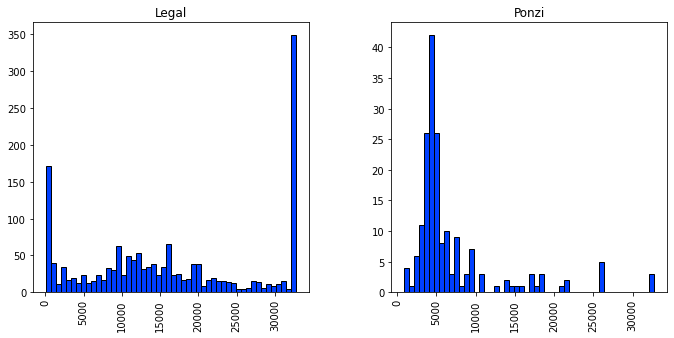

In [74]:
mpl.rcParams['patch.force_edgecolor'] = True
plt.style.use('seaborn-bright')
data_filtered.hist(column='length', by='Type', bins=50,figsize=(11,5))

In [22]:
#Procesamiento de texto y vectorización de sus mensajes

In [23]:
#Creemos un nuevo dataframe. Necesitaremos una copia más tarde

In [3]:
#Ahora defina nuestra función de precesión de texto. También eliminará los signos de puntuación y las palabras vacías.

In [81]:
text_feat = data_filtered['opcodes'].copy()

In [82]:
def text_process(text):
    
    text = text.translate(str.maketrans('', '', string.punctuation))
    #text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    #TODO:implement stopwords list for some special cases
    text = [word for word in text.split()]
    return " ".join(text)

In [83]:
text_feat = text_feat.apply(text_process)

In [84]:
# TODO: rollback
vectorizer = TfidfVectorizer()
#using ngrams to vectorize
#vectorizer_ngram = TfidfVectorizer(tokenizer=str.split, ngram_range=(1, 3))
#ngram_tfidf_matrix = vectorizer_ngram.fit_transform(data_filtered['opcodes'])


In [85]:
features = vectorizer.fit_transform(text_feat)

In [89]:
data_filtered = data_filtered.dropna(subset=['Type'])
features = vectorizer.fit_transform(data_filtered['opcodes'])

In [90]:

features_train, features_test, labels_train, labels_test = train_test_split(
    features, 
    data_filtered['Type'], 
    test_size=0.3, 
    random_state=111, 
    stratify=data_filtered['Type']
)
#features_train, features_test, labels_train, labels_test = train_test_split(features, data['Type'], test_size=0.3, random_state=111, )


In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC #checar por que debe ser SVM (no deberia ser SVC es solo para regresion)
#Cfloat, default=1.0
#Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
# validar un kerner
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
    from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import cosine_similarity




In [92]:
#TAREAS
# validar mas metaparametros, por overfitting
# probar f1 accuracy puede ser engañoso para datos desbalanceados
# validar para negativos (especificidad??)
# verificar que si corresponda segun el ordern de datos
# revisar si IT-IDF realmente esta identificando las palabras clave, es por ello que tenemos tanto overfitting?
# validar si hay error en el codigo??
# hacer una grid refinando el experimento
# validar / cambiar hiper parametros y evaluar cambios para proceso experimental
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [93]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}


In [94]:
def train_classifier(clf, feature_train, labels_train):    
    clf.fit(feature_train, labels_train)


In [95]:
def predict_labels(clf, features):
    return (clf.predict(features))

In [96]:

#introduce senoid 

from sklearn.metrics.pairwise import cosine_similarity

# Compute the centroid vector for each class in the training data
class_centroids = {}
unique_labels = np.unique(labels_train)
for label in unique_labels:
    centroid = features_train[labels_train == label].mean(axis=0)
    # Convert centroid to numpy array (if it's not already)
    class_centroids[label] = np.asarray(centroid).reshape(1, -1)  # Ensure it's a 2D array

    
# Compute cosine similarity between each document and each class centroid
similarity_features_train = np.hstack([cosine_similarity(features_train, class_centroids[label]) for label in unique_labels])
similarity_features_test = np.hstack([cosine_similarity(features_test, class_centroids[label]) for label in unique_labels])
# Use these similarity scores as additional features
features_train_extended = np.hstack((features_train.toarray(), similarity_features_train))
features_test_extended = np.hstack((features_test.toarray(), similarity_features_test))

In [97]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, accuracy_score(labels_test,pred)))


In [98]:
pred_scores

[('SVC', 0.981651376146789),
 ('KN', 0.9779816513761468),
 ('NB', 0.8972477064220183),
 ('DT', 0.9963302752293578),
 ('LR', 0.9871559633027523),
 ('RF', 0.9963302752293578),
 ('AdaBoost', 0.998165137614679),
 ('BgC', 0.9963302752293578),
 ('ETC', 0.9944954128440368)]

In [99]:
df = pd.DataFrame.from_records(pred_scores, index='', columns=[ '', 'Score'])
df

,,Score
,,
SVC,SVC,0.981651
KN,KN,0.977982
NB,NB,0.897248
DT,DT,0.996330
LR,LR,0.987156
RF,RF,0.996330
AdaBoost,AdaBoost,0.998165
BgC,BgC,0.996330
ETC,ETC,0.994495


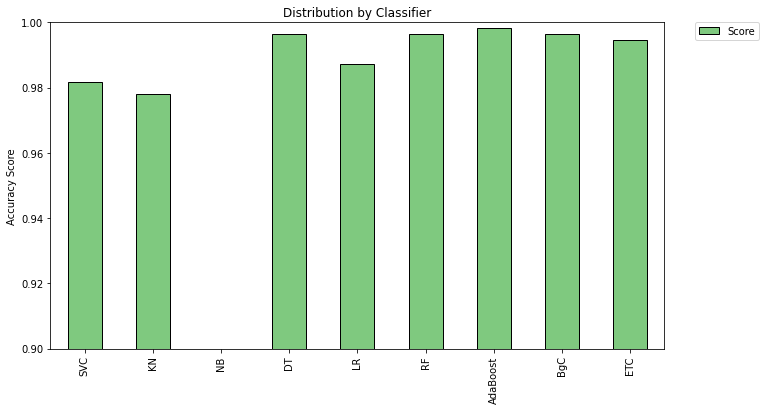

In [100]:
df.plot(kind='bar', ylim=(0.9,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [102]:
#K-fold Cross validation

In [104]:
from sklearn.model_selection import cross_val_score

# Define a classifier
clf = RandomForestClassifier(n_estimators=31, random_state=111)

# Get cross-validation scores
scores = cross_val_score(clf, features, data_filtered['Type'], cv=5)

# Print each cv score (accuracy) and average them
print(scores)
print(f"Average CV Score: {np.mean(scores)}")

[0.93131868 1.         0.99724518 0.9862259  0.99724518]
Average CV Score: 0.9824069869524414


In [118]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
print(skf)
clf = RandomForestClassifier(n_estimators=31, random_state=111)

scores = cross_val_score(clf, features, data_filtered['Type'], cv=skf)

print(scores)
print(f"Average CV Score: {np.mean(scores)}")

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
[0.93131868 1.         0.99724518 0.9862259  0.99724518]
Average CV Score: 0.9824069869524414


In [ ]:
#usemos otros parametros para validar el modelo

In [119]:
clf = RandomForestClassifier(n_estimators=31, random_state=111)
clf.fit(features_train, labels_train)

RandomForestClassifier(n_estimators=31, random_state=111)

In [121]:
predicted_labels = clf.predict(features_test)

In [122]:
# Precision Recall F-score
from sklearn.metrics import classification_report

report = classification_report(labels_test, predicted_labels)
print(report)

              precision    recall  f1-score   support

       Legal       1.00      1.00      1.00       490
       Ponzi       1.00      0.96      0.98        55

    accuracy                           1.00       545
   macro avg       1.00      0.98      0.99       545
weighted avg       1.00      1.00      1.00       545



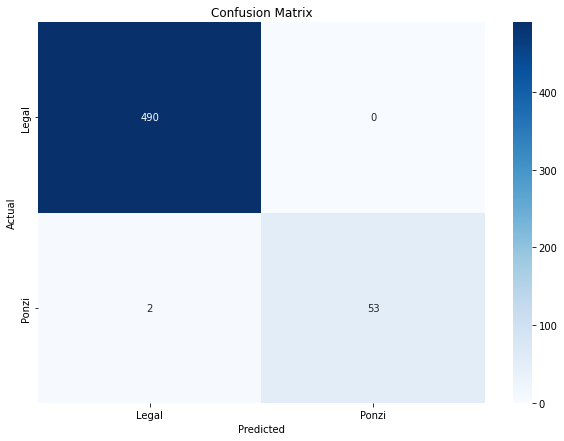

In [123]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(labels_test, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Legal', 'Ponzi'], yticklabels=['Legal', 'Ponzi'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [113]:
#Vamos a hacer Kfold para todos los modelos

In [137]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
clfs = {
    'SVC': SVC(kernel='linear'),
    'KN': KNeighborsClassifier(n_neighbors=3),
    'NB': MultinomialNB(),
    'DT': DecisionTreeClassifier(),
    'LR': LogisticRegression(),
    'RF': RandomForestClassifier(n_estimators=31, random_state=111),
    'AdaBoost': AdaBoostClassifier(n_estimators=31, random_state=111),
    'BgC': BaggingClassifier(n_estimators=31, random_state=111),
    'ETC': ExtraTreesClassifier(n_estimators=31, random_state=111)
}
cv_scores = {}  # Dictionary to store CV scores for each classifier

skf = StratifiedKFold(n_splits=5)  # Initialize stratified k-fold

for name, clf in clfs.items():
    scores = cross_val_score(clf, features, data_filtered['Type'], cv=skf)
    cv_scores[name] = (scores, np.mean(scores))

# Print the results
for name, (scores, avg_score) in cv_scores.items():
    print(f"{name} - Scores: {scores}")
    print(f"{name} - Average CV Score: {avg_score}\n")


SVC - Scores: [0.99725275 1.         0.99724518 0.95867769 0.98071625]
SVC - Average CV Score: 0.9867783731420096

KN - Scores: [0.99725275 1.         0.9862259  0.96969697 0.99724518]
KN - Average CV Score: 0.9900841582659764

NB - Scores: [0.89835165 0.8953168  0.89807163 0.8953168  0.90082645]
NB - Average CV Score: 0.897576665758484

DT - Scores: [0.92032967 0.99449036 0.99449036 0.98898072 0.98898072]
DT - Average CV Score: 0.9774543638180002

LR - Scores: [0.98076923 0.99449036 0.97245179 0.94214876 0.97796143]
LR - Average CV Score: 0.9735643144734054

RF - Scores: [0.93131868 1.         0.99724518 0.9862259  0.99724518]
RF - Average CV Score: 0.9824069869524414

AdaBoost - Scores: [0.90384615 1.         1.         0.98898072 0.98071625]
AdaBoost - Average CV Score: 0.9747086247086246

BgC - Scores: [0.9010989  0.99449036 1.         0.98898072 0.99724518]
BgC - Average CV Score: 0.9763630309084854

ETC - Scores: [0.93131868 1.         0.99449036 0.96694215 0.99449036]
ETC - Aver

In [108]:
#Lest' try to balanace dat a

In [129]:
!pip install imbalanced-learn==0.7.0 scikit-learn==0.23.2



     |████████████████████████████████| 167 kB 171 kB/s eta 0:00:01
     |████████████████████████████████| 7.2 MB 3.5 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.1
    Uninstalling scikit-learn-1.3.1:
      Successfully uninstalled scikit-learn-1.3.1
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.11.0
    Uninstalling imbalanced-learn-0.11.0:
      Successfully uninstalled imbalanced-learn-0.11.0
You should consider upgrading via the '/Users/rafael/PycharmProjects/etherscan/venv/bin/python3 -m pip install --upgrade pip' command.


In [132]:
#Random Over-sampling:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
features_resampled, labels_resampled = ros.fit_resample(features, data_filtered['Type'])


In [133]:
#SMOTE (Synthetic Minority Over-sampling Technique):
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
features_resampled, labels_resampled = smote.fit_resample(features, data_filtered['Type'])


In [134]:
#Random Under-sampling:

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
features_resampled, labels_resampled = rus.fit_resample(features, data_filtered['Type'])


In [135]:
#Combining Over-sampling with Under-sampling (SMOTE + ENN):

from imblearn.combine import SMOTEENN

sme = SMOTEENN(random_state=42)
features_resampled, labels_resampled = sme.fit_resample(features, data_filtered['Type'])


In [136]:
# Splitting the resampled data
features_train_resampled, features_test_resampled, labels_train_resampled, labels_test_resampled = train_test_split(
    features_resampled, labels_resampled, test_size=0.3, random_state=111
)

# Training a classifier on the resampled data (taking RandomForest as an example)
clf = RandomForestClassifier(n_estimators=31, random_state=111)
clf.fit(features_train_resampled, labels_train_resampled)

# Predicting on the test set
predicted_labels_resampled = clf.predict(features_test_resampled)

# Evaluating the model
print(classification_report(labels_test_resampled, predicted_labels_resampled))


              precision    recall  f1-score   support

       Legal       1.00      1.00      1.00       513
       Ponzi       1.00      1.00      1.00       465

    accuracy                           1.00       978
   macro avg       1.00      1.00      1.00       978
weighted avg       1.00      1.00      1.00       978



In [ ]:
# aplicas regularizacion: Ponerle restricciones al modelo (L1 y L2)
# Limito que los números de mi modelo tengan una penalizacion si son grandes

In [ ]:
# Regularizacion especifica por tecnicas (para MLP-> dropout)

In [52]:
# Split the data into features and labels
X = features
y = data['Type']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit on data and return a balanced dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

In [53]:
#Sppliting data
from sklearn.model_selection import train_test_split

X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

In [54]:
#Using previous clasiffiers
for k, v in clfs.items():
    v.fit(X_train_resampled, y_train_resampled)

In [55]:
#  Evaluate Model Performance with Cross-Validation
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Stratified K-Fold maintains the class distribution in each fold.
skf = StratifiedKFold(n_splits=5)

# Create a function to print cross-validation scores for each classifier
def print_cv_scores(clfs, X, y, cv):
    for name, clf in clfs.items():
        f1_scorer = make_scorer(f1_score, average='macro')  # Use macro-average for multi-class problems
        scores = cross_val_score(clf, X, y, cv=cv, scoring=f1_scorer)
        
        print(f"{name} - F1 Scores: {scores}")
        print(f"{name} - Average F1 Score: {np.mean(scores)}\n")

print_cv_scores(clfs, X_train_resampled, y_train_resampled, skf)

SVC - F1 Scores: [0.9979628  0.99796304 1.         0.99591728 0.99591776]
SVC - Average F1 Score: 0.9975521739184654

KN - F1 Scores: [1.         0.99592531 1.         0.99795849 0.99795877]
KN - Average F1 Score: 0.9983685146502257

NB - F1 Scores: [0.98981247 0.98981602 0.99795877 0.98979384 0.98979486]
NB - Average F1 Score: 0.9914351915824456

DT - F1 Scores: [0.9979628  1.         1.         1.         0.99795849]
DT - Average F1 Score: 0.9991842588514193

LR - F1 Scores: [0.99592531 0.99185306 0.99795877 0.99183551 0.99183619]
LR - Average F1 Score: 0.9938817671688163

RF - F1 Scores: [1. 1. 1. 1. 1.]
RF - Average F1 Score: 1.0

AdaBoost - F1 Scores: [1.         1.         0.99795877 1.         0.99795849]
AdaBoost - Average F1 Score: 0.9991834524095617

BgC - F1 Scores: [0.9979628  1.         1.         1.         0.99795849]
BgC - Average F1 Score: 0.9991842588514193

ETC - F1 Scores: [1. 1. 1. 1. 1.]
ETC - Average F1 Score: 1.0



In [56]:
#Evaluate on Test sets

for name, clf in clfs.items():
    y_pred = clf.predict(X_test_resampled)
    f1 = f1_score(y_test_resampled, y_pred, average='macro')
    print(f"{name} - Test F1 Score: {f1}\n")

SVC - Test F1 Score: 1.0

KN - Test F1 Score: 0.9987747209044897

NB - Test F1 Score: 0.9950970990170224

DT - Test F1 Score: 1.0

LR - Test F1 Score: 0.9950970990170224

RF - Test F1 Score: 1.0

AdaBoost - Test F1 Score: 1.0

BgC - Test F1 Score: 1.0

ETC - Test F1 Score: 1.0



In [42]:
def stemmer (text):
    text = text.split()
    words = ""
    for i in text:
            stemmer = SnowballStemmer("english")
            words += (stemmer.stem(i))+" "
    return words

In [43]:
text_feat = text_feat.apply(stemmer)

In [44]:
features = vectorizer.fit_transform(text_feat)


In [43]:
features_train, features_test, labels_train, labels_test = train_test_split(features, data['Type'], test_size=0.3, random_state=111, stratify=data['Type'])
features_train, features_test, labels_train, labels_test = train_test_split(features, data_filtered['Type'], test_size=0.3, random_state=111)

In [44]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [113]:
df2 = pd.DataFrame.from_records(pred_scores, index='', columns=['','Score2'])
df = pd.concat([df,df2],axis=1)
df

#pd.DataFrame.from_records(pred_scores, index='', columns=[ '', 'Score'])

,,Score,,Score2
,,,,
SVC,SVC,0.989011,SVC,0.989011
KN,KN,0.985348,KN,0.985348
NB,NB,0.908425,NB,0.908425
DT,DT,0.998168,DT,0.998168
LR,LR,0.992674,LR,0.990842
RF,RF,0.998168,RF,0.998168
AdaBoost,AdaBoost,0.990842,AdaBoost,0.990842
BgC,BgC,1.000000,BgC,1.000000
ETC,ETC,0.998168,ETC,0.998168


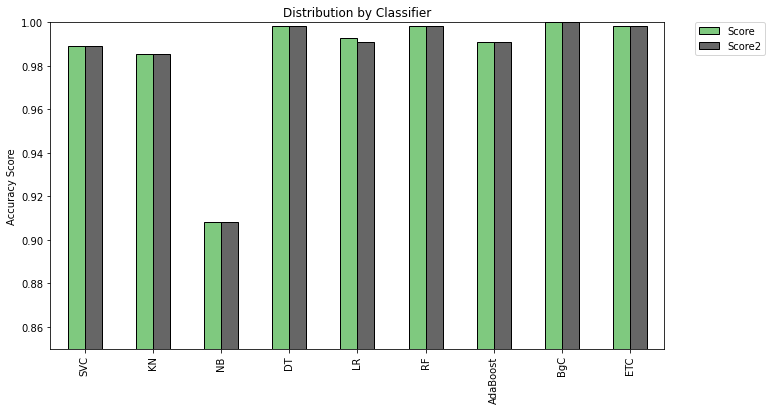

In [114]:
df.plot(kind='bar', ylim=(0.85,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [115]:
lf = data_filtered['length'].to_numpy()
newfeat = np.hstack((features.todense(),lf[:, None]))

In [116]:
features_train, features_test, labels_train, labels_test = train_test_split(newfeat, data_filtered['Type'], test_size=0.3, random_state=111)


In [117]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [118]:
df3 = pd.DataFrame.from_records(pred_scores,index='', columns=['', 'Score3'])
df = pd.concat([df,df3],axis=1)
df
#pd.DataFrame.from_records(pred_scores, index='', columns=[ '', 'Score'])

,,Score,,Score2,,Score3
,,,,,,
SVC,SVC,0.989011,SVC,0.989011,SVC,[0.9084249084249084]
KN,KN,0.985348,KN,0.985348,KN,[0.9304029304029304]
NB,NB,0.908425,NB,0.908425,NB,[0.9010989010989011]
DT,DT,0.998168,DT,0.998168,DT,[0.9926739926739927]
LR,LR,0.992674,LR,0.990842,LR,[0.9945054945054945]
RF,RF,0.998168,RF,0.998168,RF,[0.9981684981684982]
AdaBoost,AdaBoost,0.990842,AdaBoost,0.990842,AdaBoost,[0.9908424908424909]
BgC,BgC,1.000000,BgC,1.000000,BgC,[1.0]
ETC,ETC,0.998168,ETC,0.998168,ETC,[0.9963369963369964]


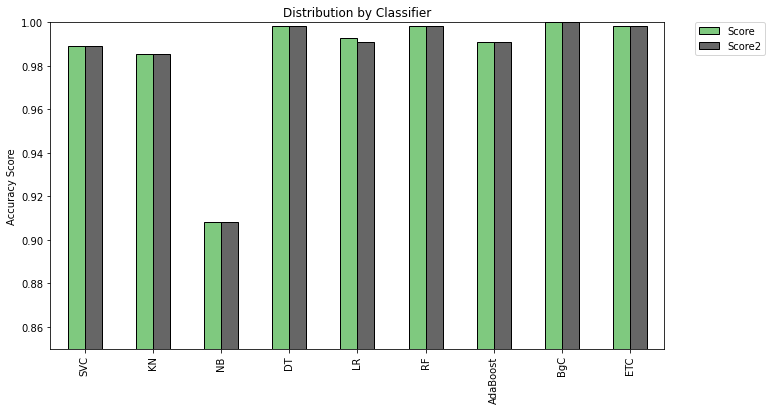

In [119]:
df.plot(kind='bar', ylim=(0.85,1.0), figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [52]:
from sklearn.ensemble import VotingClassifier


In [53]:
eclf = VotingClassifier(estimators=[('BgC', bc), ('ETC', etc), ('RF', rfc), ('Ada', abc)], voting='soft')


In [54]:
eclf.fit(features_train,labels_train)


VotingClassifier(estimators=[('BgC',
                              BaggingClassifier(n_estimators=9,
                                                random_state=111)),
                             ('ETC',
                              ExtraTreesClassifier(n_estimators=9,
                                                   random_state=111)),
                             ('RF',
                              RandomForestClassifier(n_estimators=31,
                                                     random_state=111)),
                             ('Ada',
                              AdaBoostClassifier(n_estimators=62,
                                                 random_state=111))],
                 voting='soft')

In [55]:
pred = eclf.predict(features_test)


In [56]:
print(accuracy_score(labels_test,pred))

1.0


In [57]:
from wordcloud import WordCloud, STOPWORDS

In [58]:
#STOPWORDS = {'PUSH','PUSH1', 'DUP1', 'DUP' , 'POP', 'POP ', ' POP'}

In [59]:
data_ponzi = data.query('Type == "Ponzi"')

In [60]:
data_no_ponzi = data.query('Type == "Legal"') 

In [61]:
wordcloud_no_ponzi = WordCloud().generate(' '.join(data_no_ponzi['opcodes']))
wordcloud_ponzi = WordCloud().generate(' '.join(data_ponzi['opcodes']))

In [62]:
import matplotlib.pyplot as plt


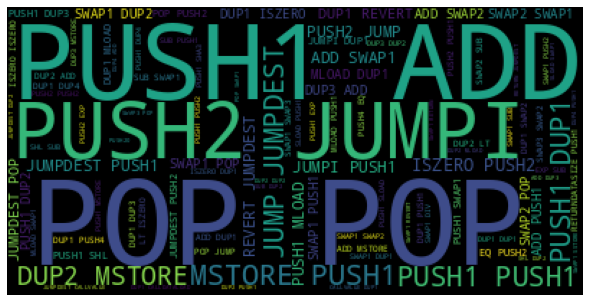

In [63]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_no_ponzi) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

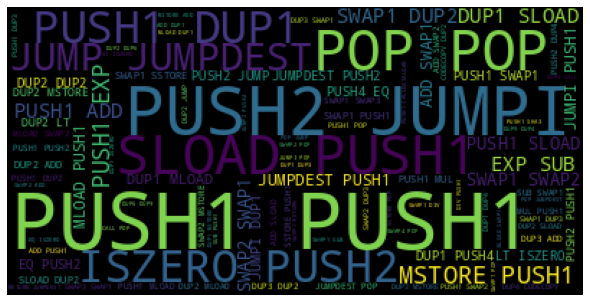

In [64]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_ponzi) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


In [65]:
pd.options.display.max_seq_items = 100
pd.set_option('display.max_rows', 500)


In [66]:
data_ponzi.opcodes.str.split(expand=True).stack().value_counts()

PUSH1             36842
SWAP1             17395
DUP2              13245
PUSH2             13060
POP               11252
DUP1              10211
ADD                9404
SWAP2              9049
SLOAD              8710
JUMPDEST           7758
MSTORE             6929
JUMPI              6720
DUP3               6120
MLOAD              5196
AND                4884
DUP4               4813
ISZERO             4718
SUB                4638
JUMP               4101
EXP                3505
SWAP3              3320
SSTORE             3144
MUL                2844
EQ                 2595
LT                 2234
PUSH4              1924
DIV                1792
DUP5               1534
DUP6               1410
SWAP4              1403
SHA3               1340
NOT                1262
GT                 1140
DUP9               1044
CALLER             1043
CODECOPY            997
PUSH32              972
CALLVALUE           904
CALLDATALOAD        811
CALL                754
RETURN              612
OR              

In [67]:
data_no_ponzi.opcodes.str.split(expand=True).stack().value_counts()

PUSH1             882505
DUP1              374389
SWAP1             368446
POP               361903
PUSH2             361356
DUP2              302099
ADD               295690
JUMPDEST          272078
MSTORE            214458
SWAP2             169402
AND               164002
ISZERO            158056
MLOAD             156951
JUMPI             152733
DUP3              148152
JUMP              139369
SUB               118676
DUP4              105173
REVERT             82323
PUSH20             79793
SWAP3              71046
PUSH4              63321
SLOAD              62564
DUP5               43161
EQ                 41136
SHA3               37486
SHL                36765
EXP                34948
LT                 34387
MUL                31822
RETURNDATASIZE     30604
CALLDATALOAD       30100
DUP6               24172
DIV                23418
PUSH32             22219
SWAP4              21785
GT                 19488
DUP7               19403
SSTORE             19192
NOT                18736


In [68]:
stopwords = {'PUSH1','POP', 'ISZERO'}

In [69]:
# natural language processing: n-gram ranking
import re
import unicodedata
import nltk
from nltk.corpus import stopwords

In [70]:
# add appropriate words that will be ignored in the analysis
ADDITIONAL_STOPWORDS = ['Unknown']

import matplotlib.pyplot as plt

In [71]:
(pd.Series(nltk.ngrams(data_ponzi.opcodes(0), 2)).value_counts())[:10]


TypeError: 'Series' object is not callable

In [72]:
data_ponzi.opcodes.iloc[0]

"PUSH1 PUSH1 MSTORE CALLDATASIZE ISZERO PUSH2 JUMPI PUSH1 PUSH1 EXP PUSH1 CALLDATALOAD DIV PUSH4 DUP2 EQ PUSH2 JUMPI DUP1 PUSH4 EQ PUSH2 JUMPI DUP1 PUSH4 EQ PUSH2 JUMPI DUP1 PUSH4 EQ PUSH2 JUMPI DUP1 PUSH4 EQ PUSH2 JUMPI DUP1 PUSH4 EQ PUSH2 JUMPI DUP1 PUSH4 EQ PUSH2 JUMPI DUP1 PUSH4 EQ PUSH2 JUMPI DUP1 PUSH4 EQ PUSH2 JUMPI DUP1 PUSH4 EQ PUSH2 JUMPI DUP1 PUSH4 EQ PUSH2 JUMPI DUP1 PUSH4 EQ PUSH2 JUMPI DUP1 PUSH4 EQ PUSH2 JUMPI DUP1 PUSH4 EQ PUSH2 JUMPI JUMPDEST PUSH2 PUSH2 PUSH1 PUSH2 JUMP JUMPDEST PUSH2 PUSH1 SLOAD PUSH4 AND DUP2 JUMP JUMPDEST PUSH2 PUSH1 SLOAD PUSH1 AND DUP2 JUMP JUMPDEST PUSH2 PUSH1 SLOAD PUSH1 PUSH1 PUSH1 EXP SUB AND DUP2 JUMP JUMPDEST PUSH2 PUSH1 SLOAD DUP2 JUMP JUMPDEST PUSH2 PUSH1 CALLDATALOAD PUSH1 SLOAD PUSH1 PUSH1 PUSH1 EXP SUB SWAP1 DUP2 AND CALLER SWAP2 SWAP1 SWAP2 AND EQ ISZERO PUSH2 JUMPI PUSH1 DUP1 SLOAD PUSH1 PUSH1 PUSH1 EXP SUB NOT AND DUP3 OR SWAP1 SSTORE POP JUMP JUMPDEST PUSH2 PUSH1 DUP1 SLOAD CALLVALUE ADD SWAP1 SSTORE JUMP JUMPDEST PUSH2 PUSH1 DUP1 

In [ ]:
#Deep Learning Proceess

In [73]:
pip install keras-tcn

     |████████████████████████████████| 588 kB 7.2 MB/s eta 0:00:01
     |████████████████████████████████| 217.4 MB 15 kB/s s eta 0:00:01███████████████▎| 212.8 MB 11.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 8.7 MB/s eta 0:00:01
     |████████████████████████████████| 13.2 MB 3.3 MB/s eta 0:00:011
     |████████████████████████████████| 4.4 MB 9.0 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 18.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 17.4 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 24.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 16.5 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 11.0 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.3 MB/s  eta 0:00:01
     |████████████████████████████████| 126 kB 27.0 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 29.1 MB/s e

In [45]:
#using TDIDF ()
# is a handy algorithm that uses the frequency of words to determine how relevant those words are to a given document.
# It’s a relatively simple but intuitive approach to weighting words,
# allowing it to act as a great jumping off point for a variety of tasks

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd